# Convolutional Neural Network (CNN)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

import os
from pickle import dump, load

from keras.models import Sequential, load_model

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils, to_categorical

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

print('All modules imported.')

All modules imported.


In [2]:
# Collect data

data_dir = 'TFS_Dataset/'
pickle_dir = 'TFS_Dataset/Pickle/'
model_dir = 'TFS_Dataset/Model/'

In [3]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

## Load Pickle file data


In [4]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train.pkl'), 'rb')
X_train,y_train = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test.pkl'), 'rb')
X_test,y_test = load(fid)
fid.close()

# Load all Validation images & label data
fid = open((pickle_dir+'X_val_y_val.pkl'), 'rb')
X_val,y_val = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [5]:
print("Number of Training examples =", len(X_train))
print("Number of Testing examples =", len(X_test))
print("Number of Validation examples =", len(X_val))
print("Image data shape =", (X_train.shape[1], X_train.shape[2],X_train.shape[3]))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Number of Validation examples = 43
Image data shape = (32, 32, 3)
Number of classes = 43


## Reshape training, testing and validation data


In [6]:
type(X_train), type(X_test),type(X_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [7]:
# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, channels)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, channels)
#X_val = X_val.reshape(X_val.shape[0], img_height, img_width, channels) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_val = X_val.astype('float32')

In [8]:
type(X_train), type(X_test),type(X_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [9]:
X_train

array([[[[ 63.,  60.,  57.],
         [ 63.,  62.,  61.],
         [ 64.,  63.,  59.],
         ...,
         [198., 208., 211.],
         [202., 209., 212.],
         [203., 206., 210.]],

        [[ 63.,  62.,  60.],
         [ 66.,  64.,  63.],
         [ 65.,  64.,  61.],
         ...,
         [204., 208., 210.],
         [207., 209., 211.],
         [206., 209., 214.]],

        [[ 62.,  61.,  60.],
         [ 66.,  61.,  60.],
         [ 64.,  62.,  60.],
         ...,
         [211., 213., 216.],
         [210., 214., 219.],
         [206., 211., 217.]],

        ...,

        [[ 64.,  59.,  52.],
         [ 69.,  64.,  55.],
         [ 70.,  66.,  58.],
         ...,
         [193., 200., 203.],
         [170., 175., 175.],
         [158., 164., 159.]],

        [[ 58.,  56.,  51.],
         [ 62.,  61.,  54.],
         [ 68.,  67.,  57.],
         ...,
         [186., 193., 197.],
         [139., 148., 144.],
         [114., 125., 122.]],

        [[ 60.,  59.,  52.],
       

## Standardize the data

In [10]:
# Scale the values between 0 and 1

X_train = X_train / 255 
X_test = X_test / 255

print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)


X_train :  (39209, 32, 32, 3)
y_train :  (39209,)
X_test :  (12630, 32, 32, 3)
y_test :  (12630,)


In [11]:
X_train

array([[[[0.24705882, 0.23529412, 0.22352941],
         [0.24705882, 0.24313726, 0.23921569],
         [0.2509804 , 0.24705882, 0.23137255],
         ...,
         [0.7764706 , 0.8156863 , 0.827451  ],
         [0.7921569 , 0.81960785, 0.83137256],
         [0.79607844, 0.80784315, 0.8235294 ]],

        [[0.24705882, 0.24313726, 0.23529412],
         [0.25882354, 0.2509804 , 0.24705882],
         [0.25490198, 0.2509804 , 0.23921569],
         ...,
         [0.8       , 0.8156863 , 0.8235294 ],
         [0.8117647 , 0.81960785, 0.827451  ],
         [0.80784315, 0.81960785, 0.8392157 ]],

        [[0.24313726, 0.23921569, 0.23529412],
         [0.25882354, 0.23921569, 0.23529412],
         [0.2509804 , 0.24313726, 0.23529412],
         ...,
         [0.827451  , 0.8352941 , 0.84705883],
         [0.8235294 , 0.8392157 , 0.85882354],
         [0.80784315, 0.827451  , 0.8509804 ]],

        ...,

        [[0.2509804 , 0.23137255, 0.20392157],
         [0.27058825, 0.2509804 , 0.21568628]

In [12]:
y_train.shape, y_test.shape

((39209,), (12630,))

In [13]:
# Converting the output labels into one hot encoding

y_train = np_utils.to_categorical(y_train,NUM_CATEGORIES)

y_test = np_utils.to_categorical(y_test,NUM_CATEGORIES)


In [14]:
# Label after OneHotEncoding:
print ("Y_train: ",y_train.shape)
print (y_train[:5])

# Label after OneHotEncoding:
print ("Y_test: ",y_test.shape)
print (y_test[:5])

Y_train:  (39209, 43)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Y_test:  (12630, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

# Define the Network Architecture :

## 1 CNN layer & 1 Fully Connected Dense layers:

In [114]:
def model_creator():

    model = Sequential()
    
    # CNN first layer (with 32 3x3 filter):
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(img_height,img_width,channels)))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer:
    model.add(Dropout(0.25))   # Dropout layer to avoid overfitting
    
    # output Fully connected Dense layers:
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')
    
    print(model.summary())
    
    return model

# Training

In [122]:
model = model_creator()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               802944    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [124]:
%%time 

history = model.fit(X_train, y_train, validation_split=0.20, batch_size=32,  epochs=15, verbose=1)

model.save("CNN_model_epoch_15.h5")

Epoch 1/15
981/981 [==============================] - 47s 48ms/step - loss: 0.8992 - accuracy: 0.7355 - val_loss: 0.2189 - val_accuracy: 0.9582
Epoch 2/15
981/981 [==============================] - 44s 45ms/step - loss: 0.3702 - accuracy: 0.8844 - val_loss: 0.1069 - val_accuracy: 0.9750
Epoch 3/15
981/981 [==============================] - 43s 44ms/step - loss: 0.2581 - accuracy: 0.9189 - val_loss: 0.0750 - val_accuracy: 0.9796
Epoch 4/15
981/981 [==============================] - 43s 44ms/step - loss: 0.2013 - accuracy: 0.9363 - val_loss: 0.0602 - val_accuracy: 0.9850
Epoch 5/15
981/981 [==============================] - 43s 44ms/step - loss: 0.1700 - accuracy: 0.9445 - val_loss: 0.0417 - val_accuracy: 0.9889
Epoch 6/15
981/981 [==============================] - 42s 43ms/step - loss: 0.1414 - accuracy: 0.9529 - val_loss: 0.0449 - val_accuracy: 0.9883
Epoch 7/15
981/981 [==============================] - 43s 43ms/step - loss: 0.1231 - accuracy: 0.9599 - val_loss: 0.0422 - val_accuracy:

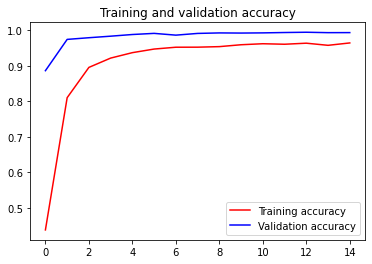

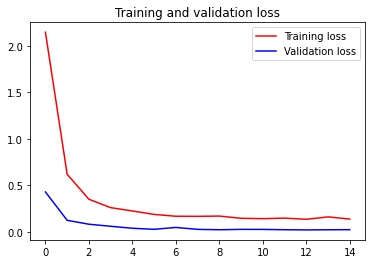

In [201]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [126]:
## pickle model data
merge = [accuracy, val_accuracy,loss,val_loss]
fid = open("modelA&L_data.pkl","wb")
dump(merge, fid)
fid.close()

## Testing:

In [127]:
predicted_classes = model.predict(X_test)

In [128]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('\nThe CNN(1&1) Model accuracy: ', score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.1270 - accuracy: 0.9695

The CNN(1&1) Model accuracy:  0.9695170521736145




## Find Best epoch and batch_size  by using Grid Search CV 

In [209]:
from  sklearn.model_selection  import  GridSearchCV

seed = 2
np.random.seed(seed)

model = KerasClassifier(build_fn = model_creator, verbose=1)

#### Run sklearn GridSearch to find the best batch_size and epochs :

In [214]:
batch_size = [30 , 50 , 100 ]
epochs = [10 , 15 , 20, 30]

# create a dictionary for grid parameter:
param_grid = dict(epochs=epochs,batch_size = batch_size)
print(param_grid,'\n')

{'epochs': [10, 15, 20, 30], 'batch_size': [30, 50, 100]} 



In [215]:
%%time
# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_log_loss')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

Epoch 1/10
1177/1177 [==============================] - 46s 39ms/step - loss: 1.9382 - accuracy: 0.4867
Epoch 2/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.4020 - accuracy: 0.8760
Epoch 3/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.2516 - accuracy: 0.9231
Epoch 4/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1896 - accuracy: 0.9400
Epoch 5/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1444 - accuracy: 0.9536
Epoch 6/10
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1254 - accuracy: 0.9598
Epoch 7/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0988 - accuracy: 0.9688
Epoch 8/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.0956 - accuracy: 0.9683
Epoch 9/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0935 - accuracy: 0.9680
Epoch 10/10
 17/131 [==>...........................] - ETA: 0s 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 3ms/step
Epoch 1/10
1177/1177 [==============================] - 45s 38ms/step - loss: 1.7994 - accuracy: 0.5230
Epoch 2/10
1177/1177 [==============================] - 43s 37ms/step - loss: 0.3529 - accuracy: 0.8941
Epoch 3/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.2156 - accuracy: 0.9329
Epoch 4/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1599 - accuracy: 0.9479
Epoch 5/10
1177/1177 [==============================] - 41s 35ms/step - loss: 0.1259 - accuracy: 0.9591
Epoch 6/10
1177/1177 [==============================] - 50s 42ms/step - loss: 0.1110 - accuracy: 0.9642
Epoch 7/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.0809 - accuracy: 0.9748
Epoch 8/10
1177/1177 [==============================] - 41s 34ms/step - loss: 0.0695 - accuracy: 0.9782
Epoch 9/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.0695 - accuracy: 0.9767
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/10
1177/1177 [==============================] - 41s 35ms/step - loss: 1.8460 - accuracy: 0.5115
Epoch 2/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.3495 - accuracy: 0.8959
Epoch 3/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.2214 - accuracy: 0.9306
Epoch 4/10
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1645 - accuracy: 0.9469
Epoch 5/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1290 - accuracy: 0.9605
Epoch 6/10
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1076 - accuracy: 0.9651
Epoch 7/10
1177/1177 [==============================] - 43s 36ms/step - loss: 0.0963 - accuracy: 0.9704
Epoch 8/10
1177/1177 [==============================] - 42s 35ms/step - loss: 0.0859 - accuracy: 0.9719
Epoch 9/10
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0796 - accuracy: 0.9747
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 3ms/step
Epoch 1/10
1177/1177 [==============================] - 45s 38ms/step - loss: 1.7836 - accuracy: 0.5147
Epoch 2/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.3317 - accuracy: 0.9009
Epoch 3/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2004 - accuracy: 0.9371
Epoch 4/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1457 - accuracy: 0.9569
Epoch 5/10
1177/1177 [==============================] - 41s 35ms/step - loss: 0.0983 - accuracy: 0.9675
Epoch 6/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0997 - accuracy: 0.9698
Epoch 7/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.0768 - accuracy: 0.9766
Epoch 8/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.0673 - accuracy: 0.9787
Epoch 9/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0636 - accuracy: 0.9798
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/10
1177/1177 [==============================] - 46s 39ms/step - loss: 2.1292 - accuracy: 0.4235
Epoch 2/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.5161 - accuracy: 0.8395
Epoch 3/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.3233 - accuracy: 0.8993
Epoch 4/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.2454 - accuracy: 0.9240
Epoch 5/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1993 - accuracy: 0.9372
Epoch 6/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1705 - accuracy: 0.9424
Epoch 7/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1468 - accuracy: 0.9527
Epoch 8/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1283 - accuracy: 0.9594
Epoch 9/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1118 - accuracy: 0.9644
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/10
1177/1177 [==============================] - 46s 39ms/step - loss: 2.2498 - accuracy: 0.3859
Epoch 2/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.6345 - accuracy: 0.7971
Epoch 3/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.4316 - accuracy: 0.8589
Epoch 4/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.3352 - accuracy: 0.8911
Epoch 5/10
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2663 - accuracy: 0.9119
Epoch 6/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.2308 - accuracy: 0.9251
Epoch 7/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.1989 - accuracy: 0.9332
Epoch 8/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1810 - accuracy: 0.9417
Epoch 9/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1512 - accuracy: 0.9505
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/10
1177/1177 [==============================] - 46s 39ms/step - loss: 1.8542 - accuracy: 0.4959
Epoch 2/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.3567 - accuracy: 0.8897
Epoch 3/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.2214 - accuracy: 0.9307
Epoch 4/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1606 - accuracy: 0.9498
Epoch 5/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.1321 - accuracy: 0.9565
Epoch 6/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.1049 - accuracy: 0.9658
Epoch 7/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.0895 - accuracy: 0.9709
Epoch 8/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0857 - accuracy: 0.9710
Epoch 9/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.0743 - accuracy: 0.9753
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/10
1177/1177 [==============================] - 45s 38ms/step - loss: 1.9179 - accuracy: 0.4745
Epoch 2/10
1177/1177 [==============================] - 44s 37ms/step - loss: 0.4100 - accuracy: 0.8704
Epoch 3/10
1177/1177 [==============================] - 44s 38ms/step - loss: 0.2551 - accuracy: 0.9210
Epoch 4/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1964 - accuracy: 0.9340
Epoch 5/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1629 - accuracy: 0.9474
Epoch 6/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1323 - accuracy: 0.9564
Epoch 7/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1060 - accuracy: 0.9651
Epoch 8/10
1177/1177 [==============================] - 45s 39ms/step - loss: 0.0911 - accuracy: 0.9695
Epoch 9/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0854 - accuracy: 0.9715
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/10
1177/1177 [==============================] - 46s 39ms/step - loss: 2.0357 - accuracy: 0.4432
Epoch 2/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.4812 - accuracy: 0.8490
Epoch 3/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.3372 - accuracy: 0.8948
Epoch 4/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.2581 - accuracy: 0.9186
Epoch 5/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.2159 - accuracy: 0.9292
Epoch 6/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1725 - accuracy: 0.9421
Epoch 7/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1527 - accuracy: 0.9495
Epoch 8/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1281 - accuracy: 0.9557
Epoch 9/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1146 - accuracy: 0.9628
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/10
1177/1177 [==============================] - 49s 42ms/step - loss: 1.8321 - accuracy: 0.4949
Epoch 2/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.3866 - accuracy: 0.8819
Epoch 3/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.2461 - accuracy: 0.9229
Epoch 4/10
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1793 - accuracy: 0.9453
Epoch 5/10
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1423 - accuracy: 0.9550
Epoch 6/10
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1214 - accuracy: 0.9619
Epoch 7/10
1177/1177 [==============================] - 52s 44ms/step - loss: 0.1021 - accuracy: 0.9669
Epoch 8/10
1177/1177 [==============================] - 55s 46ms/step - loss: 0.0896 - accuracy: 0.9717
Epoch 9/10
1177/1177 [==============================] - 54s 46ms/step - loss: 0.0783 - accuracy: 0.9752
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/15
1177/1177 [==============================] - 45s 38ms/step - loss: 2.0776 - accuracy: 0.4472
Epoch 2/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.4844 - accuracy: 0.8497
Epoch 3/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.3273 - accuracy: 0.8980
Epoch 4/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2464 - accuracy: 0.9205
Epoch 5/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2008 - accuracy: 0.9354
Epoch 6/15
1177/1177 [==============================] - 45s 39ms/step - loss: 0.1698 - accuracy: 0.9466
Epoch 7/15
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1579 - accuracy: 0.9482
Epoch 8/15
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1336 - accuracy: 0.9563
Epoch 9/15
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1220 - accuracy: 0.9595
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/15
1177/1177 [==============================] - 52s 44ms/step - loss: 1.8119 - accuracy: 0.5216
Epoch 2/15
1177/1177 [==============================] - 51s 44ms/step - loss: 0.3622 - accuracy: 0.8901
Epoch 3/15
1177/1177 [==============================] - 51s 43ms/step - loss: 0.2311 - accuracy: 0.9281
Epoch 4/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1662 - accuracy: 0.9479
Epoch 5/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1305 - accuracy: 0.9588
Epoch 6/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1169 - accuracy: 0.9613
Epoch 7/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.0920 - accuracy: 0.9719
Epoch 8/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.0829 - accuracy: 0.9724
Epoch 9/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.0771 - accuracy: 0.9756
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/15
1177/1177 [==============================] - 53s 45ms/step - loss: 1.7856 - accuracy: 0.5310
Epoch 2/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.3164 - accuracy: 0.9055
Epoch 3/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1997 - accuracy: 0.9409
Epoch 4/15
1177/1177 [==============================] - 52s 45ms/step - loss: 0.1423 - accuracy: 0.9568
Epoch 5/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1126 - accuracy: 0.9644
Epoch 6/15
1177/1177 [==============================] - 52s 44ms/step - loss: 0.0966 - accuracy: 0.9707
Epoch 7/15
1177/1177 [==============================] - 52s 44ms/step - loss: 0.0831 - accuracy: 0.9747
Epoch 8/15
1177/1177 [==============================] - 52s 44ms/step - loss: 0.0780 - accuracy: 0.9746
Epoch 9/15
1177/1177 [==============================] - 51s 44ms/step - loss: 0.0691 - accuracy: 0.9787
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/15
1177/1177 [==============================] - 53s 45ms/step - loss: 2.2151 - accuracy: 0.4026
Epoch 2/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.6024 - accuracy: 0.8128
Epoch 3/15
1177/1177 [==============================] - 52s 44ms/step - loss: 0.4192 - accuracy: 0.8622
Epoch 4/15
1177/1177 [==============================] - 55s 46ms/step - loss: 0.3200 - accuracy: 0.8954
Epoch 5/15
1177/1177 [==============================] - 56s 48ms/step - loss: 0.2498 - accuracy: 0.9174
Epoch 6/15
1177/1177 [==============================] - 56s 47ms/step - loss: 0.2085 - accuracy: 0.9290
Epoch 7/15
1177/1177 [==============================] - 55s 47ms/step - loss: 0.1772 - accuracy: 0.9437
Epoch 8/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.1530 - accuracy: 0.9498
Epoch 9/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.1274 - accuracy: 0.9576
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 6ms/step
Epoch 1/15
1177/1177 [==============================] - 52s 43ms/step - loss: 2.0085 - accuracy: 0.4540
Epoch 2/15
1177/1177 [==============================] - 51s 43ms/step - loss: 0.4179 - accuracy: 0.8683
Epoch 3/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.2549 - accuracy: 0.9166
Epoch 4/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.1941 - accuracy: 0.9376
Epoch 5/15
1177/1177 [==============================] - 53s 45ms/step - loss: 0.1605 - accuracy: 0.9471
Epoch 6/15
1177/1177 [==============================] - 59s 50ms/step - loss: 0.1311 - accuracy: 0.9568
Epoch 7/15
1177/1177 [==============================] - 55s 47ms/step - loss: 0.1132 - accuracy: 0.9620
Epoch 8/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.0963 - accuracy: 0.9690
Epoch 9/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.0863 - accuracy: 0.9713
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 6ms/step
Epoch 1/15
1177/1177 [==============================] - 55s 46ms/step - loss: 2.1188 - accuracy: 0.4218
Epoch 2/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.4922 - accuracy: 0.8480
Epoch 3/15
1177/1177 [==============================] - 55s 46ms/step - loss: 0.3095 - accuracy: 0.9010
Epoch 4/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.2421 - accuracy: 0.9193
Epoch 5/15
1177/1177 [==============================] - 56s 48ms/step - loss: 0.1881 - accuracy: 0.9371
Epoch 6/15
1177/1177 [==============================] - 59s 50ms/step - loss: 0.1564 - accuracy: 0.9485
Epoch 7/15
1177/1177 [==============================] - 57s 49ms/step - loss: 0.1304 - accuracy: 0.9580
Epoch 8/15
1177/1177 [==============================] - 54s 46ms/step - loss: 0.1151 - accuracy: 0.9638
Epoch 9/15
1177/1177 [==============================] - 52s 44ms/step - loss: 0.1010 - accuracy: 0.9674
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/15
1177/1177 [==============================] - 43s 36ms/step - loss: 1.9592 - accuracy: 0.4629
Epoch 2/15
1177/1177 [==============================] - 43s 37ms/step - loss: 0.3784 - accuracy: 0.8820
Epoch 3/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2476 - accuracy: 0.9223
Epoch 4/15
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1763 - accuracy: 0.9441
Epoch 5/15
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1476 - accuracy: 0.9513
Epoch 6/15
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1224 - accuracy: 0.9599
Epoch 7/15
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1038 - accuracy: 0.9648
Epoch 8/15
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0943 - accuracy: 0.9698
Epoch 9/15
1177/1177 [==============================] - 63s 54ms/step - loss: 0.0780 - accuracy: 0.9734
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 10ms/step
Epoch 1/15
1177/1177 [==============================] - 100s 83ms/step - loss: 1.9515 - accuracy: 0.4668
Epoch 2/15
1177/1177 [==============================] - 98s 84ms/step - loss: 0.4320 - accuracy: 0.8660
Epoch 3/15
1177/1177 [==============================] - 98s 84ms/step - loss: 0.2661 - accuracy: 0.9126
Epoch 4/15
1177/1177 [==============================] - 114s 97ms/step - loss: 0.2054 - accuracy: 0.9336
Epoch 5/15
1177/1177 [==============================] - 109s 92ms/step - loss: 0.1698 - accuracy: 0.9457
Epoch 6/15
1177/1177 [==============================] - 110s 94ms/step - loss: 0.1284 - accuracy: 0.9579
Epoch 7/15
1177/1177 [==============================] - 112s 95ms/step - loss: 0.1140 - accuracy: 0.9622
Epoch 8/15
1177/1177 [==============================] - 118s 100ms/step - loss: 0.0914 - accuracy: 0.9705
Epoch 9/15
1177/1177 [==============================] - 121s 102ms/step - loss: 0.0851 - accuracy: 0.9715

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 2s 10ms/step
Epoch 1/15
1177/1177 [==============================] - 103s 86ms/step - loss: 2.0330 - accuracy: 0.4411
Epoch 2/15
1177/1177 [==============================] - 110s 93ms/step - loss: 0.4799 - accuracy: 0.8462
Epoch 3/15
1177/1177 [==============================] - 110s 94ms/step - loss: 0.3022 - accuracy: 0.9055
Epoch 4/15
1177/1177 [==============================] - 103s 88ms/step - loss: 0.2150 - accuracy: 0.9318
Epoch 5/15
1177/1177 [==============================] - 114s 97ms/step - loss: 0.1805 - accuracy: 0.9428
Epoch 6/15
1177/1177 [==============================] - 112s 95ms/step - loss: 0.1613 - accuracy: 0.9475
Epoch 7/15
1177/1177 [==============================] - 106s 90ms/step - loss: 0.1382 - accuracy: 0.9548
Epoch 8/15
1177/1177 [==============================] - 96s 82ms/step - loss: 0.1126 - accuracy: 0.9617
Epoch 9/15
1177/1177 [==============================] - 99s 84ms/step - loss: 0.1028 - accuracy: 0.9675
E

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 2s 10ms/step
Epoch 1/15
1177/1177 [==============================] - 91s 76ms/step - loss: 1.9405 - accuracy: 0.4619
Epoch 2/15
1177/1177 [==============================] - 94s 80ms/step - loss: 0.4099 - accuracy: 0.8720
Epoch 3/15
1177/1177 [==============================] - 91s 78ms/step - loss: 0.2513 - accuracy: 0.9211
Epoch 4/15
1177/1177 [==============================] - 87s 74ms/step - loss: 0.1944 - accuracy: 0.9382
Epoch 5/15
1177/1177 [==============================] - 85s 72ms/step - loss: 0.1619 - accuracy: 0.9487
Epoch 6/15
1177/1177 [==============================] - 83s 71ms/step - loss: 0.1332 - accuracy: 0.9551
Epoch 7/15
1177/1177 [==============================] - 84s 71ms/step - loss: 0.1164 - accuracy: 0.9635
Epoch 8/15
1177/1177 [==============================] - 84s 71ms/step - loss: 0.0924 - accuracy: 0.9708
Epoch 9/15
1177/1177 [==============================] - 84s 72ms/step - loss: 0.0833 - accuracy: 0.9726
Epoch 10

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 9ms/step
Epoch 1/20
1177/1177 [==============================] - 102s 85ms/step - loss: 1.8729 - accuracy: 0.5045
Epoch 2/20
1177/1177 [==============================] - 104s 89ms/step - loss: 0.3676 - accuracy: 0.8867
Epoch 3/20
1177/1177 [==============================] - 101s 86ms/step - loss: 0.2239 - accuracy: 0.9301
Epoch 4/20
1177/1177 [==============================] - 99s 84ms/step - loss: 0.1645 - accuracy: 0.9497
Epoch 5/20
1177/1177 [==============================] - 100s 85ms/step - loss: 0.1409 - accuracy: 0.9543
Epoch 6/20
1177/1177 [==============================] - 101s 86ms/step - loss: 0.1084 - accuracy: 0.9645
Epoch 7/20
1177/1177 [==============================] - 99s 84ms/step - loss: 0.0921 - accuracy: 0.9706
Epoch 8/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.0876 - accuracy: 0.9708
Epoch 9/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.0762 - accuracy: 0.9752
Epoc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 2s 10ms/step
Epoch 1/20
1177/1177 [==============================] - 106s 88ms/step - loss: 1.8952 - accuracy: 0.4979
Epoch 2/20
1177/1177 [==============================] - 105s 89ms/step - loss: 0.3858 - accuracy: 0.8829
Epoch 3/20
1177/1177 [==============================] - 103s 88ms/step - loss: 0.2419 - accuracy: 0.9276
Epoch 4/20
1177/1177 [==============================] - 102s 87ms/step - loss: 0.1727 - accuracy: 0.9441
Epoch 5/20
1177/1177 [==============================] - 102s 87ms/step - loss: 0.1461 - accuracy: 0.9558
Epoch 6/20
1177/1177 [==============================] - 101s 86ms/step - loss: 0.1264 - accuracy: 0.9593
Epoch 7/20
1177/1177 [==============================] - 99s 84ms/step - loss: 0.1012 - accuracy: 0.9663
Epoch 8/20
1177/1177 [==============================] - 100s 85ms/step - loss: 0.0853 - accuracy: 0.9710
Epoch 9/20
1177/1177 [==============================] - 100s 85ms/step - loss: 0.0719 - accuracy: 0.9761


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 9ms/step
Epoch 1/20
1177/1177 [==============================] - 97s 81ms/step - loss: 1.8074 - accuracy: 0.5228
Epoch 2/20
1177/1177 [==============================] - 95s 81ms/step - loss: 0.3142 - accuracy: 0.9076
Epoch 3/20
1177/1177 [==============================] - 96s 81ms/step - loss: 0.1873 - accuracy: 0.9407
Epoch 4/20
1177/1177 [==============================] - 96s 81ms/step - loss: 0.1485 - accuracy: 0.9535
Epoch 5/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.1274 - accuracy: 0.9594
Epoch 6/20
1177/1177 [==============================] - 96s 81ms/step - loss: 0.0967 - accuracy: 0.9690
Epoch 7/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.0827 - accuracy: 0.9723
Epoch 8/20
1177/1177 [==============================] - 96s 82ms/step - loss: 0.0804 - accuracy: 0.9740
Epoch 9/20
1177/1177 [==============================] - 96s 82ms/step - loss: 0.0687 - accuracy: 0.9782
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 10ms/step
Epoch 1/20
1177/1177 [==============================] - 99s 82ms/step - loss: 1.9867 - accuracy: 0.4644
Epoch 2/20
1177/1177 [==============================] - 96s 82ms/step - loss: 0.4121 - accuracy: 0.8742
Epoch 3/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.2544 - accuracy: 0.9209
Epoch 4/20
1177/1177 [==============================] - 96s 82ms/step - loss: 0.1868 - accuracy: 0.9395
Epoch 5/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.1605 - accuracy: 0.9508
Epoch 6/20
1177/1177 [==============================] - 97s 83ms/step - loss: 0.1270 - accuracy: 0.9598
Epoch 7/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.1132 - accuracy: 0.9650
Epoch 8/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.0965 - accuracy: 0.9693
Epoch 9/20
1177/1177 [==============================] - 96s 82ms/step - loss: 0.0981 - accuracy: 0.9696
Epoch 10

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 10ms/step
Epoch 1/20
1177/1177 [==============================] - 99s 83ms/step - loss: 1.9962 - accuracy: 0.4560
Epoch 2/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.4018 - accuracy: 0.8779
Epoch 3/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.2368 - accuracy: 0.9276
Epoch 4/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.1817 - accuracy: 0.9447
Epoch 5/20
1177/1177 [==============================] - 97s 83ms/step - loss: 0.1547 - accuracy: 0.9519
Epoch 6/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.1193 - accuracy: 0.9619
Epoch 7/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.1074 - accuracy: 0.9651
Epoch 8/20
1177/1177 [==============================] - 98s 83ms/step - loss: 0.1019 - accuracy: 0.9665
Epoch 9/20
1177/1177 [==============================] - 97s 82ms/step - loss: 0.0842 - accuracy: 0.9750
Epoch 10

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 6ms/step
Epoch 1/20
1177/1177 [==============================] - 65s 55ms/step - loss: 2.0014 - accuracy: 0.4574
Epoch 2/20
1177/1177 [==============================] - 64s 55ms/step - loss: 0.4158 - accuracy: 0.8748
Epoch 3/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.2727 - accuracy: 0.9157
Epoch 4/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.2047 - accuracy: 0.9338
Epoch 5/20
1177/1177 [==============================] - 64s 55ms/step - loss: 0.1647 - accuracy: 0.9466
Epoch 6/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.1372 - accuracy: 0.9566
Epoch 7/20
1177/1177 [==============================] - 64s 55ms/step - loss: 0.1234 - accuracy: 0.9602
Epoch 8/20
1177/1177 [==============================] - 64s 55ms/step - loss: 0.1097 - accuracy: 0.9654
Epoch 9/20
1177/1177 [==============================] - 64s 55ms/step - loss: 0.1009 - accuracy: 0.9675
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 6ms/step
Epoch 1/20
1177/1177 [==============================] - 66s 55ms/step - loss: 2.0020 - accuracy: 0.4475
Epoch 2/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.4145 - accuracy: 0.8713
Epoch 3/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.2475 - accuracy: 0.9218
Epoch 4/20
1177/1177 [==============================] - 65s 55ms/step - loss: 0.1766 - accuracy: 0.9444
Epoch 5/20
1177/1177 [==============================] - 44s 37ms/step - loss: 0.1437 - accuracy: 0.9542
Epoch 6/20
1177/1177 [==============================] - 43s 36ms/step - loss: 0.1210 - accuracy: 0.9602
Epoch 7/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1108 - accuracy: 0.9640
Epoch 8/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0929 - accuracy: 0.9715
Epoch 9/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0845 - accuracy: 0.9724
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/20
1177/1177 [==============================] - 44s 37ms/step - loss: 1.7560 - accuracy: 0.5262
Epoch 2/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.3027 - accuracy: 0.9076
Epoch 3/20
1177/1177 [==============================] - 44s 37ms/step - loss: 0.1768 - accuracy: 0.9466
Epoch 4/20
1177/1177 [==============================] - 44s 37ms/step - loss: 0.1318 - accuracy: 0.9597
Epoch 5/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1062 - accuracy: 0.9651
Epoch 6/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0866 - accuracy: 0.9717
Epoch 7/20
1177/1177 [==============================] - 43s 36ms/step - loss: 0.0744 - accuracy: 0.9770
Epoch 8/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0664 - accuracy: 0.9786
Epoch 9/20
1177/1177 [==============================] - 43s 37ms/step - loss: 0.0647 - accuracy: 0.9787
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 3ms/step
Epoch 1/20
1177/1177 [==============================] - 42s 36ms/step - loss: 2.2071 - accuracy: 0.3885
Epoch 2/20
1177/1177 [==============================] - 41s 35ms/step - loss: 0.6295 - accuracy: 0.7975
Epoch 3/20
1177/1177 [==============================] - 41s 35ms/step - loss: 0.4262 - accuracy: 0.8592
Epoch 4/20
1177/1177 [==============================] - 42s 35ms/step - loss: 0.3345 - accuracy: 0.8901
Epoch 5/20
1177/1177 [==============================] - 42s 35ms/step - loss: 0.2656 - accuracy: 0.9132
Epoch 6/20
1177/1177 [==============================] - 41s 35ms/step - loss: 0.2162 - accuracy: 0.9288
Epoch 7/20
1177/1177 [==============================] - 41s 35ms/step - loss: 0.1871 - accuracy: 0.9394
Epoch 8/20
1177/1177 [==============================] - 42s 35ms/step - loss: 0.1569 - accuracy: 0.9467
Epoch 9/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.1416 - accuracy: 0.9555
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/20
1177/1177 [==============================] - 43s 36ms/step - loss: 1.7776 - accuracy: 0.5166
Epoch 2/20
1177/1177 [==============================] - 42s 35ms/step - loss: 0.3429 - accuracy: 0.8965
Epoch 3/20
1177/1177 [==============================] - 42s 35ms/step - loss: 0.2086 - accuracy: 0.9359
Epoch 4/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.1522 - accuracy: 0.9522
Epoch 5/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.1080 - accuracy: 0.9663
Epoch 6/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0889 - accuracy: 0.9721
Epoch 7/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0764 - accuracy: 0.9759
Epoch 8/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0721 - accuracy: 0.9764
Epoch 9/20
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0636 - accuracy: 0.9790
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 45s 38ms/step - loss: 1.9836 - accuracy: 0.4685
Epoch 2/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.4147 - accuracy: 0.8718
Epoch 3/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2419 - accuracy: 0.9244
Epoch 4/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1960 - accuracy: 0.9386
Epoch 5/30
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1491 - accuracy: 0.9525
Epoch 6/30
1177/1177 [==============================] - 43s 37ms/step - loss: 0.1277 - accuracy: 0.9584
Epoch 7/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1092 - accuracy: 0.9656
Epoch 8/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0953 - accuracy: 0.9686
Epoch 9/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.0837 - accuracy: 0.9725
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 46s 39ms/step - loss: 2.0398 - accuracy: 0.4563
Epoch 2/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.4131 - accuracy: 0.8720
Epoch 3/30
1177/1177 [==============================] - 49s 41ms/step - loss: 0.2528 - accuracy: 0.9200
Epoch 4/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1820 - accuracy: 0.9435
Epoch 5/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1453 - accuracy: 0.9531
Epoch 6/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1197 - accuracy: 0.9618
Epoch 7/30
1177/1177 [==============================] - 45s 39ms/step - loss: 0.1005 - accuracy: 0.9682
Epoch 8/30
1177/1177 [==============================] - 49s 42ms/step - loss: 0.0927 - accuracy: 0.9702
Epoch 9/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.0747 - accuracy: 0.9749
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 46s 38ms/step - loss: 1.9789 - accuracy: 0.4697
Epoch 2/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.4262 - accuracy: 0.8697
Epoch 3/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.2747 - accuracy: 0.9152
Epoch 4/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1980 - accuracy: 0.9361
Epoch 5/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1532 - accuracy: 0.9503
Epoch 6/30
1177/1177 [==============================] - 45s 39ms/step - loss: 0.1383 - accuracy: 0.9554
Epoch 7/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1072 - accuracy: 0.9651
Epoch 8/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.0884 - accuracy: 0.9701
Epoch 9/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0847 - accuracy: 0.9721
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 48s 41ms/step - loss: 1.9708 - accuracy: 0.4678
Epoch 2/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.4407 - accuracy: 0.8619
Epoch 3/30
1177/1177 [==============================] - 44s 38ms/step - loss: 0.2901 - accuracy: 0.9075
Epoch 4/30
1177/1177 [==============================] - 44s 37ms/step - loss: 0.2002 - accuracy: 0.9356
Epoch 5/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1739 - accuracy: 0.9441
Epoch 6/30
1177/1177 [==============================] - 44s 38ms/step - loss: 0.1393 - accuracy: 0.9554
Epoch 7/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1219 - accuracy: 0.9607
Epoch 8/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1055 - accuracy: 0.9651
Epoch 9/30
1177/1177 [==============================] - 45s 39ms/step - loss: 0.0915 - accuracy: 0.9702
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 46s 39ms/step - loss: 1.9743 - accuracy: 0.4636
Epoch 2/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.4093 - accuracy: 0.8751
Epoch 3/30
1177/1177 [==============================] - 52s 44ms/step - loss: 0.2516 - accuracy: 0.9235
Epoch 4/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1879 - accuracy: 0.9383
Epoch 5/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1512 - accuracy: 0.9500
Epoch 6/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1314 - accuracy: 0.9573
Epoch 7/30
1177/1177 [==============================] - 48s 40ms/step - loss: 0.1165 - accuracy: 0.9626
Epoch 8/30
1177/1177 [==============================] - 49s 41ms/step - loss: 0.0945 - accuracy: 0.9699
Epoch 9/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0798 - accuracy: 0.9747
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 49s 41ms/step - loss: 1.9569 - accuracy: 0.4673
Epoch 2/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.3724 - accuracy: 0.8860
Epoch 3/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.2240 - accuracy: 0.9298
Epoch 4/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1686 - accuracy: 0.9469
Epoch 5/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1350 - accuracy: 0.9577
Epoch 6/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1071 - accuracy: 0.9660
Epoch 7/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.0940 - accuracy: 0.9705
Epoch 8/30
1177/1177 [==============================] - 50s 42ms/step - loss: 0.0870 - accuracy: 0.9727
Epoch 9/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.0781 - accuracy: 0.9750
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 5ms/step
Epoch 1/30
1177/1177 [==============================] - 41s 34ms/step - loss: 1.8826 - accuracy: 0.4827
Epoch 2/30
1177/1177 [==============================] - 40s 34ms/step - loss: 0.3687 - accuracy: 0.8857
Epoch 3/30
1177/1177 [==============================] - 41s 35ms/step - loss: 0.2296 - accuracy: 0.9293
Epoch 4/30
1177/1177 [==============================] - 42s 35ms/step - loss: 0.1728 - accuracy: 0.9452
Epoch 5/30
1177/1177 [==============================] - 39s 33ms/step - loss: 0.1362 - accuracy: 0.9557
Epoch 6/30
1177/1177 [==============================] - 42s 36ms/step - loss: 0.1141 - accuracy: 0.9638
Epoch 7/30
1177/1177 [==============================] - 42s 36ms/step - loss: 0.0943 - accuracy: 0.9670
Epoch 8/30
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0839 - accuracy: 0.9731
Epoch 9/30
1177/1177 [==============================] - 44s 37ms/step - loss: 0.0837 - accuracy: 0.9733
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 46s 39ms/step - loss: 1.8288 - accuracy: 0.5055
Epoch 2/30
1177/1177 [==============================] - 45s 39ms/step - loss: 0.3806 - accuracy: 0.8819
Epoch 3/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.2271 - accuracy: 0.9277
Epoch 4/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1718 - accuracy: 0.9449
Epoch 5/30
1177/1177 [==============================] - 45s 38ms/step - loss: 0.1404 - accuracy: 0.9552
Epoch 6/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.1214 - accuracy: 0.9613
Epoch 7/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1059 - accuracy: 0.9643
Epoch 8/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.0891 - accuracy: 0.9718
Epoch 9/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.0911 - accuracy: 0.9694
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 4ms/step
Epoch 1/30
1177/1177 [==============================] - 50s 42ms/step - loss: 1.8650 - accuracy: 0.4905
Epoch 2/30
1177/1177 [==============================] - 49s 41ms/step - loss: 0.4075 - accuracy: 0.8742
Epoch 3/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.2565 - accuracy: 0.9204
Epoch 4/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1934 - accuracy: 0.9380
Epoch 5/30
1177/1177 [==============================] - 49s 42ms/step - loss: 0.1477 - accuracy: 0.9519
Epoch 6/30
1177/1177 [==============================] - 48s 41ms/step - loss: 0.1245 - accuracy: 0.9619
Epoch 7/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.1077 - accuracy: 0.9641
Epoch 8/30
1177/1177 [==============================] - 46s 39ms/step - loss: 0.0927 - accuracy: 0.9692
Epoch 9/30
1177/1177 [==============================] - 47s 40ms/step - loss: 0.0845 - accuracy: 0.9734
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 8ms/step
Epoch 1/30
1177/1177 [==============================] - 75s 63ms/step - loss: 2.0556 - accuracy: 0.4387
Epoch 2/30
1177/1177 [==============================] - 80s 68ms/step - loss: 0.4556 - accuracy: 0.8547
Epoch 3/30
1177/1177 [==============================] - 69s 59ms/step - loss: 0.2885 - accuracy: 0.9073
Epoch 4/30
1177/1177 [==============================] - 63s 53ms/step - loss: 0.2128 - accuracy: 0.9318
Epoch 5/30
1177/1177 [==============================] - 60s 51ms/step - loss: 0.1801 - accuracy: 0.9424
Epoch 6/30
1177/1177 [==============================] - 63s 54ms/step - loss: 0.1521 - accuracy: 0.9521
Epoch 7/30
1177/1177 [==============================] - 61s 52ms/step - loss: 0.1253 - accuracy: 0.9585
Epoch 8/30
1177/1177 [==============================] - 67s 57ms/step - loss: 0.1080 - accuracy: 0.9643
Epoch 9/30
1177/1177 [==============================] - 66s 56ms/step - loss: 0.0897 - accuracy: 0.9706
Epoch 10/

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 1s 6ms/step
Epoch 1/10
706/706 [==============================] - 57s 79ms/step - loss: 2.0574 - accuracy: 0.4487
Epoch 2/10
706/706 [==============================] - 54s 77ms/step - loss: 0.4140 - accuracy: 0.8754
Epoch 3/10
706/706 [==============================] - 54s 77ms/step - loss: 0.2438 - accuracy: 0.9255
Epoch 4/10
706/706 [==============================] - 52s 73ms/step - loss: 0.1797 - accuracy: 0.9447
Epoch 5/10
706/706 [==============================] - 57s 81ms/step - loss: 0.1456 - accuracy: 0.9560
Epoch 6/10
706/706 [==============================] - 54s 76ms/step - loss: 0.1214 - accuracy: 0.9611
Epoch 7/10
706/706 [==============================] - 55s 78ms/step - loss: 0.0987 - accuracy: 0.9683
Epoch 8/10
706/706 [==============================] - 54s 77ms/step - loss: 0.0907 - accuracy: 0.9712
Epoch 9/10
706/706 [==============================] - 53s 76ms/step - loss: 0.0889 - accuracy: 0.9716
Epoch 10/10
 9/79 [==>.....

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 59s 83ms/step - loss: 2.2416 - accuracy: 0.4073
Epoch 2/10
706/706 [==============================] - 56s 80ms/step - loss: 0.5231 - accuracy: 0.8370
Epoch 3/10
706/706 [==============================] - 56s 80ms/step - loss: 0.3420 - accuracy: 0.8914
Epoch 4/10
706/706 [==============================] - 56s 80ms/step - loss: 0.2505 - accuracy: 0.9207
Epoch 5/10
706/706 [==============================] - 55s 78ms/step - loss: 0.2076 - accuracy: 0.9327
Epoch 6/10
706/706 [==============================] - 56s 79ms/step - loss: 0.1739 - accuracy: 0.9446
Epoch 7/10
706/706 [==============================] - 54s 76ms/step - loss: 0.1566 - accuracy: 0.9499
Epoch 8/10
706/706 [==============================] - 57s 81ms/step - loss: 0.1397 - accuracy: 0.9547
Epoch 9/10
706/706 [==============================] - 59s 83ms/step - loss: 0.1183 - accuracy: 0.9617
Epoch 10/10
 5/79 [>.........

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 9ms/step
Epoch 1/10
706/706 [==============================] - 54s 75ms/step - loss: 1.9047 - accuracy: 0.5034
Epoch 2/10
706/706 [==============================] - 52s 73ms/step - loss: 0.3644 - accuracy: 0.8989
Epoch 3/10
706/706 [==============================] - 54s 77ms/step - loss: 0.2089 - accuracy: 0.9371
Epoch 4/10
706/706 [==============================] - 54s 77ms/step - loss: 0.1508 - accuracy: 0.9532
Epoch 5/10
706/706 [==============================] - 55s 78ms/step - loss: 0.1225 - accuracy: 0.9616
Epoch 6/10
706/706 [==============================] - 55s 77ms/step - loss: 0.0970 - accuracy: 0.9691
Epoch 7/10
706/706 [==============================] - 55s 78ms/step - loss: 0.0874 - accuracy: 0.9726
Epoch 8/10
706/706 [==============================] - 53s 75ms/step - loss: 0.0826 - accuracy: 0.9746
Epoch 9/10
706/706 [==============================] - 55s 77ms/step - loss: 0.0679 - accuracy: 0.9781
Epoch 10/10
 8/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 56s 79ms/step - loss: 2.0790 - accuracy: 0.4437
Epoch 2/10
706/706 [==============================] - 57s 81ms/step - loss: 0.4014 - accuracy: 0.8765
Epoch 3/10
706/706 [==============================] - 56s 79ms/step - loss: 0.2504 - accuracy: 0.9223
Epoch 4/10
706/706 [==============================] - 52s 74ms/step - loss: 0.1925 - accuracy: 0.9399
Epoch 5/10
706/706 [==============================] - 52s 74ms/step - loss: 0.1531 - accuracy: 0.9539
Epoch 6/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1266 - accuracy: 0.9591
Epoch 7/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1159 - accuracy: 0.9628
Epoch 8/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0939 - accuracy: 0.9695
Epoch 9/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0817 - accuracy: 0.9741
Epoch 10/10
 9/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 52s 73ms/step - loss: 2.2154 - accuracy: 0.3996
Epoch 2/10
706/706 [==============================] - 51s 72ms/step - loss: 0.5228 - accuracy: 0.8360
Epoch 3/10
706/706 [==============================] - 51s 73ms/step - loss: 0.3251 - accuracy: 0.8997
Epoch 4/10
706/706 [==============================] - 51s 73ms/step - loss: 0.2389 - accuracy: 0.9256
Epoch 5/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1893 - accuracy: 0.9401
Epoch 6/10
706/706 [==============================] - 51s 73ms/step - loss: 0.1694 - accuracy: 0.9461
Epoch 7/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1438 - accuracy: 0.9524
Epoch 8/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1259 - accuracy: 0.9582
Epoch 9/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1174 - accuracy: 0.9628
Epoch 10/10
11/79 [===>......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 49s 68ms/step - loss: 2.1643 - accuracy: 0.4227
Epoch 2/10
706/706 [==============================] - 47s 67ms/step - loss: 0.4713 - accuracy: 0.8595
Epoch 3/10
706/706 [==============================] - 48s 67ms/step - loss: 0.2939 - accuracy: 0.9099
Epoch 4/10
706/706 [==============================] - 48s 67ms/step - loss: 0.2224 - accuracy: 0.9309
Epoch 5/10
706/706 [==============================] - 48s 68ms/step - loss: 0.1802 - accuracy: 0.9424
Epoch 6/10
706/706 [==============================] - 48s 67ms/step - loss: 0.1474 - accuracy: 0.9525
Epoch 7/10
706/706 [==============================] - 48s 67ms/step - loss: 0.1366 - accuracy: 0.9564
Epoch 8/10
706/706 [==============================] - 48s 68ms/step - loss: 0.1218 - accuracy: 0.9615
Epoch 9/10
706/706 [==============================] - 47s 67ms/step - loss: 0.1052 - accuracy: 0.9663
Epoch 10/10
 9/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 51s 71ms/step - loss: 2.0056 - accuracy: 0.4636
Epoch 2/10
706/706 [==============================] - 50s 71ms/step - loss: 0.3993 - accuracy: 0.8804
Epoch 3/10
706/706 [==============================] - 50s 71ms/step - loss: 0.2464 - accuracy: 0.9257
Epoch 4/10
706/706 [==============================] - 51s 72ms/step - loss: 0.1915 - accuracy: 0.9394
Epoch 5/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1498 - accuracy: 0.9523
Epoch 6/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1309 - accuracy: 0.9577
Epoch 7/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1211 - accuracy: 0.9603
Epoch 8/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0962 - accuracy: 0.9690
Epoch 9/10
706/706 [==============================] - 48s 67ms/step - loss: 0.0904 - accuracy: 0.9707
Epoch 10/10
 9/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 48s 67ms/step - loss: 2.0182 - accuracy: 0.4478
Epoch 2/10
706/706 [==============================] - 49s 69ms/step - loss: 0.4457 - accuracy: 0.8624
Epoch 3/10
706/706 [==============================] - 49s 69ms/step - loss: 0.2818 - accuracy: 0.9103
Epoch 4/10
706/706 [==============================] - 49s 69ms/step - loss: 0.2210 - accuracy: 0.9320
Epoch 5/10
706/706 [==============================] - 49s 69ms/step - loss: 0.1743 - accuracy: 0.9437
Epoch 6/10
706/706 [==============================] - 49s 69ms/step - loss: 0.1371 - accuracy: 0.9553
Epoch 7/10
706/706 [==============================] - 49s 69ms/step - loss: 0.1294 - accuracy: 0.9571
Epoch 8/10
706/706 [==============================] - 49s 69ms/step - loss: 0.1103 - accuracy: 0.9638
Epoch 9/10
706/706 [==============================] - 49s 69ms/step - loss: 0.1060 - accuracy: 0.9633
Epoch 10/10
10/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 51s 70ms/step - loss: 1.9148 - accuracy: 0.4858
Epoch 2/10
706/706 [==============================] - 50s 71ms/step - loss: 0.3565 - accuracy: 0.8942
Epoch 3/10
706/706 [==============================] - 50s 71ms/step - loss: 0.2195 - accuracy: 0.9316
Epoch 4/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1527 - accuracy: 0.9524
Epoch 5/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1302 - accuracy: 0.9589
Epoch 6/10
706/706 [==============================] - 50s 70ms/step - loss: 0.0960 - accuracy: 0.9689
Epoch 7/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0880 - accuracy: 0.9707
Epoch 8/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0759 - accuracy: 0.9764
Epoch 9/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0688 - accuracy: 0.9775
Epoch 10/10
 9/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/10
706/706 [==============================] - 51s 71ms/step - loss: 2.0709 - accuracy: 0.4371
Epoch 2/10
706/706 [==============================] - 50s 71ms/step - loss: 0.4703 - accuracy: 0.8552
Epoch 3/10
706/706 [==============================] - 51s 72ms/step - loss: 0.2996 - accuracy: 0.9062
Epoch 4/10
706/706 [==============================] - 51s 72ms/step - loss: 0.2261 - accuracy: 0.9300
Epoch 5/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1673 - accuracy: 0.9464
Epoch 6/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1455 - accuracy: 0.9518
Epoch 7/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1260 - accuracy: 0.9606
Epoch 8/10
706/706 [==============================] - 50s 71ms/step - loss: 0.1054 - accuracy: 0.9663
Epoch 9/10
706/706 [==============================] - 50s 71ms/step - loss: 0.0920 - accuracy: 0.9699
Epoch 10/10
 9/79 [==>.......

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 51s 72ms/step - loss: 1.9949 - accuracy: 0.4769
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.3866 - accuracy: 0.8847
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2344 - accuracy: 0.9268
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1681 - accuracy: 0.9463
Epoch 5/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1343 - accuracy: 0.9577
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1193 - accuracy: 0.9625
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1027 - accuracy: 0.9673
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.0913 - accuracy: 0.9717
Epoch 9/15
706/706 [==============================] - 50s 71ms/step - loss: 0.0750 - accuracy: 0.9740
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 8ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.0430 - accuracy: 0.4629
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.4465 - accuracy: 0.8644
Epoch 3/15
706/706 [==============================] - 50s 71ms/step - loss: 0.2880 - accuracy: 0.9085
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2227 - accuracy: 0.9302
Epoch 5/15
706/706 [==============================] - 50s 71ms/step - loss: 0.1878 - accuracy: 0.9408
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1495 - accuracy: 0.9532
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1322 - accuracy: 0.9564
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1142 - accuracy: 0.9639
Epoch 9/15
706/706 [==============================] - 50s 71ms/step - loss: 0.1001 - accuracy: 0.9666
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.0440 - accuracy: 0.4613
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.3946 - accuracy: 0.8865
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2509 - accuracy: 0.9260
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1745 - accuracy: 0.9462
Epoch 5/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1487 - accuracy: 0.9532
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1257 - accuracy: 0.9597
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1124 - accuracy: 0.9618
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.0943 - accuracy: 0.9693
Epoch 9/15
706/706 [==============================] - 50s 71ms/step - loss: 0.0843 - accuracy: 0.9724
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.1539 - accuracy: 0.4274
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.4527 - accuracy: 0.8628
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2874 - accuracy: 0.9148
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2136 - accuracy: 0.9330
Epoch 5/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1698 - accuracy: 0.9475
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1375 - accuracy: 0.9562
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1124 - accuracy: 0.9640
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1093 - accuracy: 0.9658
Epoch 9/15
706/706 [==============================] - 51s 72ms/step - loss: 0.0915 - accuracy: 0.9709
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 48s 65ms/step - loss: 2.1998 - accuracy: 0.4096
Epoch 2/15
706/706 [==============================] - 46s 65ms/step - loss: 0.5049 - accuracy: 0.8465
Epoch 3/15
706/706 [==============================] - 46s 65ms/step - loss: 0.3214 - accuracy: 0.9007
Epoch 4/15
706/706 [==============================] - 46s 65ms/step - loss: 0.2348 - accuracy: 0.9246
Epoch 5/15
706/706 [==============================] - 46s 65ms/step - loss: 0.2006 - accuracy: 0.9362
Epoch 6/15
706/706 [==============================] - 46s 65ms/step - loss: 0.1617 - accuracy: 0.9470
Epoch 7/15
706/706 [==============================] - 46s 65ms/step - loss: 0.1390 - accuracy: 0.9538
Epoch 8/15
706/706 [==============================] - 46s 66ms/step - loss: 0.1222 - accuracy: 0.9602
Epoch 9/15
706/706 [==============================] - 46s 66ms/step - loss: 0.1125 - accuracy: 0.9646
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 48s 67ms/step - loss: 2.2770 - accuracy: 0.3907
Epoch 2/15
706/706 [==============================] - 48s 67ms/step - loss: 0.5695 - accuracy: 0.8231
Epoch 3/15
706/706 [==============================] - 47s 67ms/step - loss: 0.3660 - accuracy: 0.8839
Epoch 4/15
706/706 [==============================] - 47s 67ms/step - loss: 0.2812 - accuracy: 0.9107
Epoch 5/15
706/706 [==============================] - 47s 67ms/step - loss: 0.2176 - accuracy: 0.9284
Epoch 6/15
706/706 [==============================] - 47s 67ms/step - loss: 0.1872 - accuracy: 0.9380
Epoch 7/15
706/706 [==============================] - 47s 67ms/step - loss: 0.1571 - accuracy: 0.9481
Epoch 8/15
706/706 [==============================] - 48s 68ms/step - loss: 0.1370 - accuracy: 0.9551
Epoch 9/15
706/706 [==============================] - 48s 68ms/step - loss: 0.1203 - accuracy: 0.9623
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 50s 70ms/step - loss: 2.0824 - accuracy: 0.4347
Epoch 2/15
706/706 [==============================] - 49s 70ms/step - loss: 0.4565 - accuracy: 0.8604
Epoch 3/15
706/706 [==============================] - 50s 70ms/step - loss: 0.2844 - accuracy: 0.9119
Epoch 4/15
706/706 [==============================] - 50s 70ms/step - loss: 0.2227 - accuracy: 0.9290
Epoch 5/15
706/706 [==============================] - 50s 70ms/step - loss: 0.1675 - accuracy: 0.9449
Epoch 6/15
706/706 [==============================] - 50s 70ms/step - loss: 0.1381 - accuracy: 0.9552
Epoch 7/15
706/706 [==============================] - 50s 70ms/step - loss: 0.1236 - accuracy: 0.9610
Epoch 8/15
706/706 [==============================] - 50s 70ms/step - loss: 0.1086 - accuracy: 0.9626
Epoch 9/15
706/706 [==============================] - 50s 70ms/step - loss: 0.0971 - accuracy: 0.9684
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.0230 - accuracy: 0.4543
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.3783 - accuracy: 0.8859
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2317 - accuracy: 0.9271
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1704 - accuracy: 0.9476
Epoch 5/15
706/706 [==============================] - 50s 71ms/step - loss: 0.1390 - accuracy: 0.9543
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1177 - accuracy: 0.9631
Epoch 7/15
706/706 [==============================] - 50s 71ms/step - loss: 0.0977 - accuracy: 0.9682
Epoch 8/15
706/706 [==============================] - 50s 71ms/step - loss: 0.0898 - accuracy: 0.9701
Epoch 9/15
706/706 [==============================] - 50s 71ms/step - loss: 0.0798 - accuracy: 0.9743
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 8ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.0379 - accuracy: 0.4487
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.4467 - accuracy: 0.8645
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2620 - accuracy: 0.9184
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1958 - accuracy: 0.9384
Epoch 5/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1613 - accuracy: 0.9482
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1313 - accuracy: 0.9590
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1176 - accuracy: 0.9629
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1017 - accuracy: 0.9667
Epoch 9/15
706/706 [==============================] - 51s 72ms/step - loss: 0.0815 - accuracy: 0.9730
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/15
706/706 [==============================] - 52s 72ms/step - loss: 2.1034 - accuracy: 0.4340
Epoch 2/15
706/706 [==============================] - 51s 72ms/step - loss: 0.4540 - accuracy: 0.8624
Epoch 3/15
706/706 [==============================] - 51s 72ms/step - loss: 0.2718 - accuracy: 0.9148
Epoch 4/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1995 - accuracy: 0.9393
Epoch 5/15
706/706 [==============================] - 51s 73ms/step - loss: 0.1593 - accuracy: 0.9500
Epoch 6/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1373 - accuracy: 0.9563
Epoch 7/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1176 - accuracy: 0.9632
Epoch 8/15
706/706 [==============================] - 51s 72ms/step - loss: 0.1069 - accuracy: 0.9671
Epoch 9/15
706/706 [==============================] - 51s 72ms/step - loss: 0.0864 - accuracy: 0.9724
Epoch 10/15
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 8ms/step
Epoch 1/20
706/706 [==============================] - 52s 73ms/step - loss: 2.1442 - accuracy: 0.4385
Epoch 2/20
706/706 [==============================] - 51s 73ms/step - loss: 0.4632 - accuracy: 0.8590
Epoch 3/20
706/706 [==============================] - 51s 73ms/step - loss: 0.2788 - accuracy: 0.9161
Epoch 4/20
706/706 [==============================] - 51s 73ms/step - loss: 0.2070 - accuracy: 0.9365
Epoch 5/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1701 - accuracy: 0.9453
Epoch 6/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1394 - accuracy: 0.9572
Epoch 7/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1239 - accuracy: 0.9591
Epoch 8/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1048 - accuracy: 0.9669
Epoch 9/20
706/706 [==============================] - 51s 72ms/step - loss: 0.0909 - accuracy: 0.9705
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 52s 73ms/step - loss: 2.0961 - accuracy: 0.4488
Epoch 2/20
706/706 [==============================] - 51s 73ms/step - loss: 0.4661 - accuracy: 0.8593
Epoch 3/20
706/706 [==============================] - 52s 73ms/step - loss: 0.2811 - accuracy: 0.9155
Epoch 4/20
706/706 [==============================] - 51s 72ms/step - loss: 0.2090 - accuracy: 0.9340
Epoch 5/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1628 - accuracy: 0.9486
Epoch 6/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1445 - accuracy: 0.9524
Epoch 7/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1212 - accuracy: 0.9606
Epoch 8/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1063 - accuracy: 0.9654
Epoch 9/20
706/706 [==============================] - 51s 73ms/step - loss: 0.0952 - accuracy: 0.9685
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 52s 73ms/step - loss: 1.9847 - accuracy: 0.4823
Epoch 2/20
706/706 [==============================] - 51s 73ms/step - loss: 0.4181 - accuracy: 0.8783
Epoch 3/20
706/706 [==============================] - 52s 73ms/step - loss: 0.2614 - accuracy: 0.9215
Epoch 4/20
706/706 [==============================] - 52s 73ms/step - loss: 0.1938 - accuracy: 0.9400
Epoch 5/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1573 - accuracy: 0.9510
Epoch 6/20
706/706 [==============================] - 52s 73ms/step - loss: 0.1278 - accuracy: 0.9584
Epoch 7/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1158 - accuracy: 0.9639
Epoch 8/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1022 - accuracy: 0.9678
Epoch 9/20
706/706 [==============================] - 52s 73ms/step - loss: 0.0913 - accuracy: 0.9700
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 48s 66ms/step - loss: 2.0533 - accuracy: 0.4511
Epoch 2/20
706/706 [==============================] - 47s 66ms/step - loss: 0.4121 - accuracy: 0.8759
Epoch 3/20
706/706 [==============================] - 47s 66ms/step - loss: 0.2489 - accuracy: 0.9253
Epoch 4/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1940 - accuracy: 0.9407
Epoch 5/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1377 - accuracy: 0.9564
Epoch 6/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1151 - accuracy: 0.9651
Epoch 7/20
706/706 [==============================] - 47s 66ms/step - loss: 0.0964 - accuracy: 0.9687
Epoch 8/20
706/706 [==============================] - 46s 66ms/step - loss: 0.0883 - accuracy: 0.9725
Epoch 9/20
706/706 [==============================] - 46s 66ms/step - loss: 0.0765 - accuracy: 0.9741
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 47s 66ms/step - loss: 2.1736 - accuracy: 0.4178
Epoch 2/20
706/706 [==============================] - 47s 66ms/step - loss: 0.5544 - accuracy: 0.8324
Epoch 3/20
706/706 [==============================] - 47s 66ms/step - loss: 0.3574 - accuracy: 0.8883
Epoch 4/20
706/706 [==============================] - 47s 66ms/step - loss: 0.2717 - accuracy: 0.9129
Epoch 5/20
706/706 [==============================] - 47s 66ms/step - loss: 0.2267 - accuracy: 0.9270
Epoch 6/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1968 - accuracy: 0.9378
Epoch 7/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1731 - accuracy: 0.9429
Epoch 8/20
706/706 [==============================] - 47s 66ms/step - loss: 0.1449 - accuracy: 0.9518
Epoch 9/20
706/706 [==============================] - 46s 66ms/step - loss: 0.1399 - accuracy: 0.9544
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 51s 72ms/step - loss: 2.3104 - accuracy: 0.3746
Epoch 2/20
706/706 [==============================] - 51s 72ms/step - loss: 0.5775 - accuracy: 0.8224
Epoch 3/20
706/706 [==============================] - 51s 72ms/step - loss: 0.3670 - accuracy: 0.8860
Epoch 4/20
706/706 [==============================] - 50s 71ms/step - loss: 0.2832 - accuracy: 0.9096
Epoch 5/20
706/706 [==============================] - 50s 71ms/step - loss: 0.2299 - accuracy: 0.9273
Epoch 6/20
706/706 [==============================] - 50s 71ms/step - loss: 0.1873 - accuracy: 0.9372
Epoch 7/20
706/706 [==============================] - 50s 71ms/step - loss: 0.1689 - accuracy: 0.9449
Epoch 8/20
706/706 [==============================] - 50s 71ms/step - loss: 0.1412 - accuracy: 0.9537
Epoch 9/20
706/706 [==============================] - 50s 71ms/step - loss: 0.1241 - accuracy: 0.9596
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 52s 73ms/step - loss: 2.1294 - accuracy: 0.4275
Epoch 2/20
706/706 [==============================] - 52s 73ms/step - loss: 0.4830 - accuracy: 0.8481
Epoch 3/20
706/706 [==============================] - 51s 72ms/step - loss: 0.2957 - accuracy: 0.9081
Epoch 4/20
706/706 [==============================] - 51s 73ms/step - loss: 0.2399 - accuracy: 0.9249
Epoch 5/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1908 - accuracy: 0.9402
Epoch 6/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1537 - accuracy: 0.9494
Epoch 7/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1413 - accuracy: 0.9515
Epoch 8/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1250 - accuracy: 0.9593
Epoch 9/20
706/706 [==============================] - 50s 71ms/step - loss: 0.1174 - accuracy: 0.9610
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 52s 73ms/step - loss: 2.1131 - accuracy: 0.4346
Epoch 2/20
706/706 [==============================] - 51s 73ms/step - loss: 0.4384 - accuracy: 0.8654
Epoch 3/20
706/706 [==============================] - 52s 73ms/step - loss: 0.2564 - accuracy: 0.9194
Epoch 4/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1965 - accuracy: 0.9383
Epoch 5/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1569 - accuracy: 0.9510
Epoch 6/20
706/706 [==============================] - 52s 73ms/step - loss: 0.1338 - accuracy: 0.9568
Epoch 7/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1138 - accuracy: 0.9626
Epoch 8/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1065 - accuracy: 0.9648
Epoch 9/20
706/706 [==============================] - 51s 73ms/step - loss: 0.0923 - accuracy: 0.9692
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 1s 7ms/step
Epoch 1/20
706/706 [==============================] - 52s 72ms/step - loss: 1.9872 - accuracy: 0.4677
Epoch 2/20
706/706 [==============================] - 51s 73ms/step - loss: 0.4142 - accuracy: 0.8757
Epoch 3/20
706/706 [==============================] - 51s 73ms/step - loss: 0.2573 - accuracy: 0.9218
Epoch 4/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1869 - accuracy: 0.9435
Epoch 5/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1544 - accuracy: 0.9512
Epoch 6/20
706/706 [==============================] - 51s 72ms/step - loss: 0.1337 - accuracy: 0.9573
Epoch 7/20
706/706 [==============================] - 51s 73ms/step - loss: 0.1045 - accuracy: 0.9668
Epoch 8/20
706/706 [==============================] - 51s 72ms/step - loss: 0.0881 - accuracy: 0.9710
Epoch 9/20
706/706 [==============================] - 51s 72ms/step - loss: 0.0863 - accuracy: 0.9728
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 5ms/step
Epoch 1/20
706/706 [==============================] - 33s 47ms/step - loss: 2.0588 - accuracy: 0.4444
Epoch 2/20
706/706 [==============================] - 33s 47ms/step - loss: 0.4131 - accuracy: 0.8750
Epoch 3/20
706/706 [==============================] - 33s 47ms/step - loss: 0.2517 - accuracy: 0.9229
Epoch 4/20
706/706 [==============================] - 33s 47ms/step - loss: 0.1857 - accuracy: 0.9420
Epoch 5/20
706/706 [==============================] - 33s 47ms/step - loss: 0.1600 - accuracy: 0.9488
Epoch 6/20
706/706 [==============================] - 33s 47ms/step - loss: 0.1285 - accuracy: 0.9582
Epoch 7/20
706/706 [==============================] - 33s 47ms/step - loss: 0.1086 - accuracy: 0.9651
Epoch 8/20
706/706 [==============================] - 32s 46ms/step - loss: 0.0910 - accuracy: 0.9704
Epoch 9/20
706/706 [==============================] - 32s 46ms/step - loss: 0.0843 - accuracy: 0.9740
Epoch 10/20
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.1299 - accuracy: 0.4369
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.4692 - accuracy: 0.8572
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2900 - accuracy: 0.9092
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2111 - accuracy: 0.9342
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1655 - accuracy: 0.9468
Epoch 6/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1435 - accuracy: 0.9539
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1223 - accuracy: 0.9606
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1069 - accuracy: 0.9660
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0956 - accuracy: 0.9690
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 5ms/step
Epoch 1/30
706/706 [==============================] - 34s 47ms/step - loss: 2.0518 - accuracy: 0.4626
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.3991 - accuracy: 0.8796
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2550 - accuracy: 0.9217
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1985 - accuracy: 0.9388
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1568 - accuracy: 0.9500
Epoch 6/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1267 - accuracy: 0.9597
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1149 - accuracy: 0.9622
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1016 - accuracy: 0.9677
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0857 - accuracy: 0.9720
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 5ms/step
Epoch 1/30
706/706 [==============================] - 30s 42ms/step - loss: 1.9456 - accuracy: 0.4891
Epoch 2/30
706/706 [==============================] - 30s 42ms/step - loss: 0.3491 - accuracy: 0.8960
Epoch 3/30
706/706 [==============================] - 30s 42ms/step - loss: 0.2152 - accuracy: 0.9337
Epoch 4/30
706/706 [==============================] - 30s 42ms/step - loss: 0.1556 - accuracy: 0.9532
Epoch 5/30
706/706 [==============================] - 30s 42ms/step - loss: 0.1243 - accuracy: 0.9630
Epoch 6/30
706/706 [==============================] - 29s 42ms/step - loss: 0.1047 - accuracy: 0.9672
Epoch 7/30
706/706 [==============================] - 30s 42ms/step - loss: 0.0882 - accuracy: 0.9730
Epoch 8/30
706/706 [==============================] - 29s 42ms/step - loss: 0.0786 - accuracy: 0.9751
Epoch 9/30
706/706 [==============================] - 29s 42ms/step - loss: 0.0655 - accuracy: 0.9793
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 30s 42ms/step - loss: 2.1204 - accuracy: 0.4301
Epoch 2/30
706/706 [==============================] - 30s 42ms/step - loss: 0.4931 - accuracy: 0.8510
Epoch 3/30
706/706 [==============================] - 29s 42ms/step - loss: 0.3086 - accuracy: 0.9033
Epoch 4/30
706/706 [==============================] - 29s 42ms/step - loss: 0.2353 - accuracy: 0.9224
Epoch 5/30
706/706 [==============================] - 29s 42ms/step - loss: 0.1798 - accuracy: 0.9420
Epoch 6/30
706/706 [==============================] - 30s 42ms/step - loss: 0.1559 - accuracy: 0.9502
Epoch 7/30
706/706 [==============================] - 29s 42ms/step - loss: 0.1336 - accuracy: 0.9573
Epoch 8/30
706/706 [==============================] - 29s 42ms/step - loss: 0.1199 - accuracy: 0.9620
Epoch 9/30
706/706 [==============================] - 30s 42ms/step - loss: 0.0964 - accuracy: 0.9689
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 32s 45ms/step - loss: 2.2642 - accuracy: 0.3873
Epoch 2/30
706/706 [==============================] - 32s 45ms/step - loss: 0.5711 - accuracy: 0.8234
Epoch 3/30
706/706 [==============================] - 32s 45ms/step - loss: 0.3918 - accuracy: 0.8730
Epoch 4/30
706/706 [==============================] - 32s 45ms/step - loss: 0.2866 - accuracy: 0.9055
Epoch 5/30
706/706 [==============================] - 32s 45ms/step - loss: 0.2259 - accuracy: 0.9255
Epoch 6/30
706/706 [==============================] - 32s 45ms/step - loss: 0.1962 - accuracy: 0.9374
Epoch 7/30
706/706 [==============================] - 32s 45ms/step - loss: 0.1660 - accuracy: 0.9454
Epoch 8/30
706/706 [==============================] - 32s 45ms/step - loss: 0.1497 - accuracy: 0.9508
Epoch 9/30
706/706 [==============================] - 32s 45ms/step - loss: 0.1311 - accuracy: 0.9566
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.2140 - accuracy: 0.3975
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.5485 - accuracy: 0.8291
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.3465 - accuracy: 0.8912
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2679 - accuracy: 0.9161
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2165 - accuracy: 0.9313
Epoch 6/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1782 - accuracy: 0.9412
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1517 - accuracy: 0.9509
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1300 - accuracy: 0.9571
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1175 - accuracy: 0.9604
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.1762 - accuracy: 0.4123
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.5277 - accuracy: 0.8383
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.3232 - accuracy: 0.8982
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2577 - accuracy: 0.9173
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2072 - accuracy: 0.9352
Epoch 6/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1757 - accuracy: 0.9439
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1423 - accuracy: 0.9519
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1350 - accuracy: 0.9571
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1137 - accuracy: 0.9624
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 5ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.0304 - accuracy: 0.4432
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.4051 - accuracy: 0.8752
Epoch 3/30
706/706 [==============================] - 33s 46ms/step - loss: 0.2491 - accuracy: 0.9214
Epoch 4/30
706/706 [==============================] - 32s 46ms/step - loss: 0.1828 - accuracy: 0.9443
Epoch 5/30
706/706 [==============================] - 33s 46ms/step - loss: 0.1481 - accuracy: 0.9538
Epoch 6/30
706/706 [==============================] - 33s 46ms/step - loss: 0.1225 - accuracy: 0.9605
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1073 - accuracy: 0.9657
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0959 - accuracy: 0.9695
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0845 - accuracy: 0.9721
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.0453 - accuracy: 0.4567
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.3926 - accuracy: 0.8807
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2468 - accuracy: 0.9219
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1683 - accuracy: 0.9486
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1433 - accuracy: 0.9550
Epoch 6/30
706/706 [==============================] - 33s 46ms/step - loss: 0.1179 - accuracy: 0.9641
Epoch 7/30
706/706 [==============================] - 33s 46ms/step - loss: 0.0956 - accuracy: 0.9703
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0907 - accuracy: 0.9704
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 5ms/step
Epoch 1/30
706/706 [==============================] - 33s 47ms/step - loss: 2.1126 - accuracy: 0.4285
Epoch 2/30
706/706 [==============================] - 33s 47ms/step - loss: 0.4630 - accuracy: 0.8561
Epoch 3/30
706/706 [==============================] - 33s 47ms/step - loss: 0.3009 - accuracy: 0.9072
Epoch 4/30
706/706 [==============================] - 33s 47ms/step - loss: 0.2226 - accuracy: 0.9290
Epoch 5/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1801 - accuracy: 0.9402
Epoch 6/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1525 - accuracy: 0.9507
Epoch 7/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1318 - accuracy: 0.9578
Epoch 8/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1163 - accuracy: 0.9621
Epoch 9/30
706/706 [==============================] - 33s 47ms/step - loss: 0.1003 - accuracy: 0.9676
Epoch 10/30
706/706 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 4ms/step
Epoch 1/10
353/353 [==============================] - 27s 75ms/step - loss: 2.4409 - accuracy: 0.3633
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.6190 - accuracy: 0.8169
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.3884 - accuracy: 0.8830
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2901 - accuracy: 0.9106
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2445 - accuracy: 0.9232
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2045 - accuracy: 0.9353
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1730 - accuracy: 0.9432
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1576 - accuracy: 0.9496
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1360 - accuracy: 0.9551
Epoch 10/10
 9/40 [=====>....

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 15ms/step
Epoch 1/10
353/353 [==============================] - 25s 67ms/step - loss: 2.3343 - accuracy: 0.39350s - loss: 2.3438 - accuracy
Epoch 2/10
353/353 [==============================] - 24s 67ms/step - loss: 0.5295 - accuracy: 0.8402
Epoch 3/10
353/353 [==============================] - 24s 67ms/step - loss: 0.3245 - accuracy: 0.9030
Epoch 4/10
353/353 [==============================] - 24s 67ms/step - loss: 0.2436 - accuracy: 0.9247
Epoch 5/10
353/353 [==============================] - 24s 67ms/step - loss: 0.1910 - accuracy: 0.9408
Epoch 6/10
353/353 [==============================] - 24s 68ms/step - loss: 0.1517 - accuracy: 0.9536
Epoch 7/10
353/353 [==============================] - 24s 67ms/step - loss: 0.1314 - accuracy: 0.9581
Epoch 8/10
353/353 [==============================] - 24s 68ms/step - loss: 0.1236 - accuracy: 0.9605
Epoch 9/10
353/353 [==============================] - 24s 68ms/step - loss: 0.1099 - accuracy: 0.96660

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/10
353/353 [==============================] - 24s 67ms/step - loss: 2.2421 - accuracy: 0.4153
Epoch 2/10
353/353 [==============================] - 24s 68ms/step - loss: 0.4545 - accuracy: 0.8707
Epoch 3/10
353/353 [==============================] - 24s 67ms/step - loss: 0.2816 - accuracy: 0.9155
Epoch 4/10
353/353 [==============================] - 24s 67ms/step - loss: 0.2045 - accuracy: 0.9386
Epoch 5/10
353/353 [==============================] - 24s 67ms/step - loss: 0.1616 - accuracy: 0.9509
Epoch 6/10
353/353 [==============================] - 24s 68ms/step - loss: 0.1363 - accuracy: 0.9572
Epoch 7/10
353/353 [==============================] - 24s 68ms/step - loss: 0.1138 - accuracy: 0.9649
Epoch 8/10
353/353 [==============================] - 24s 67ms/step - loss: 0.0973 - accuracy: 0.9697
Epoch 9/10
353/353 [==============================] - 24s 68ms/step - loss: 0.0946 - accuracy: 0.97140s - loss: 0.0948 - accura - 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/10
353/353 [==============================] - 26s 71ms/step - loss: 2.2535 - accuracy: 0.4043
Epoch 2/10
353/353 [==============================] - 25s 71ms/step - loss: 0.4688 - accuracy: 0.8593
Epoch 3/10
353/353 [==============================] - 25s 71ms/step - loss: 0.2726 - accuracy: 0.9185
Epoch 4/10
353/353 [==============================] - 25s 71ms/step - loss: 0.2007 - accuracy: 0.9394
Epoch 5/10
353/353 [==============================] - 25s 71ms/step - loss: 0.1596 - accuracy: 0.9506
Epoch 6/10
353/353 [==============================] - 25s 72ms/step - loss: 0.1327 - accuracy: 0.9581
Epoch 7/10
353/353 [==============================] - 25s 71ms/step - loss: 0.1147 - accuracy: 0.9644
Epoch 8/10
353/353 [==============================] - 25s 71ms/step - loss: 0.0994 - accuracy: 0.9685
Epoch 9/10
353/353 [==============================] - 25s 72ms/step - loss: 0.0931 - accuracy: 0.9712
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/10
353/353 [==============================] - 26s 74ms/step - loss: 2.4423 - accuracy: 0.3499
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.5501 - accuracy: 0.8355
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.3367 - accuracy: 0.8981
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2436 - accuracy: 0.9258
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1914 - accuracy: 0.9402
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1596 - accuracy: 0.9500
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1369 - accuracy: 0.9582
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1222 - accuracy: 0.9613
Epoch 9/10
353/353 [==============================] - 26s 73ms/step - loss: 0.1069 - accuracy: 0.9665
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/10
353/353 [==============================] - 27s 74ms/step - loss: 2.3548 - accuracy: 0.3805
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.5142 - accuracy: 0.8483
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.3225 - accuracy: 0.9051
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2232 - accuracy: 0.9338
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1704 - accuracy: 0.9490
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1510 - accuracy: 0.9516
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1201 - accuracy: 0.9622
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1139 - accuracy: 0.9631
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.0916 - accuracy: 0.9703
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/10
353/353 [==============================] - 26s 74ms/step - loss: 2.3446 - accuracy: 0.3698
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.5401 - accuracy: 0.8357
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.3416 - accuracy: 0.8969
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2475 - accuracy: 0.9220
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2050 - accuracy: 0.9355
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1683 - accuracy: 0.9460
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1474 - accuracy: 0.9530
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1268 - accuracy: 0.9596
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1167 - accuracy: 0.9621
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/10
353/353 [==============================] - 27s 74ms/step - loss: 2.2159 - accuracy: 0.4169
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.4297 - accuracy: 0.8703
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2733 - accuracy: 0.9178
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2014 - accuracy: 0.9391
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1525 - accuracy: 0.9546
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1112 - accuracy: 0.9659
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1054 - accuracy: 0.9673
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.0935 - accuracy: 0.9696
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.0801 - accuracy: 0.9745
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 15ms/step
Epoch 1/10
353/353 [==============================] - 27s 74ms/step - loss: 2.2656 - accuracy: 0.4048
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.4784 - accuracy: 0.8584
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2955 - accuracy: 0.9112
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2201 - accuracy: 0.9304
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1884 - accuracy: 0.9430
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1418 - accuracy: 0.9555
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1245 - accuracy: 0.9607
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1136 - accuracy: 0.9631
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.0990 - accuracy: 0.9673
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/10
353/353 [==============================] - 27s 75ms/step - loss: 2.3207 - accuracy: 0.3771
Epoch 2/10
353/353 [==============================] - 26s 74ms/step - loss: 0.5378 - accuracy: 0.8392
Epoch 3/10
353/353 [==============================] - 26s 74ms/step - loss: 0.3407 - accuracy: 0.8973
Epoch 4/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2480 - accuracy: 0.9233
Epoch 5/10
353/353 [==============================] - 26s 74ms/step - loss: 0.2014 - accuracy: 0.9361
Epoch 6/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1693 - accuracy: 0.9484
Epoch 7/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1347 - accuracy: 0.9572
Epoch 8/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1344 - accuracy: 0.9590
Epoch 9/10
353/353 [==============================] - 26s 74ms/step - loss: 0.1116 - accuracy: 0.9659
Epoch 10/10
 9/40 [=====>...

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 67ms/step - loss: 2.4816 - accuracy: 0.3539
Epoch 2/15
353/353 [==============================] - 24s 67ms/step - loss: 0.6396 - accuracy: 0.80370s - loss: 0.6404 - accuracy
Epoch 3/15
353/353 [==============================] - 24s 67ms/step - loss: 0.4075 - accuracy: 0.8742
Epoch 4/15
353/353 [==============================] - 24s 67ms/step - loss: 0.3180 - accuracy: 0.8995
Epoch 5/15
353/353 [==============================] - 24s 67ms/step - loss: 0.2601 - accuracy: 0.9182
Epoch 6/15
353/353 [==============================] - 24s 67ms/step - loss: 0.2315 - accuracy: 0.9287
Epoch 7/15
353/353 [==============================] - 24s 68ms/step - loss: 0.2030 - accuracy: 0.9346
Epoch 8/15
353/353 [==============================] - 24s 68ms/step - loss: 0.1833 - accuracy: 0.9399
Epoch 9/15
353/353 [==============================] - 24s 67ms/step - loss: 0.1628 - accuracy: 0.9478


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/15
353/353 [==============================] - 24s 67ms/step - loss: 2.2424 - accuracy: 0.4208
Epoch 2/15
353/353 [==============================] - 24s 67ms/step - loss: 0.4504 - accuracy: 0.8685
Epoch 3/15
353/353 [==============================] - 24s 67ms/step - loss: 0.2744 - accuracy: 0.9187
Epoch 4/15
353/353 [==============================] - 24s 67ms/step - loss: 0.1985 - accuracy: 0.9412
Epoch 5/15
353/353 [==============================] - 24s 67ms/step - loss: 0.1567 - accuracy: 0.9520
Epoch 6/15
353/353 [==============================] - 24s 68ms/step - loss: 0.1369 - accuracy: 0.9592
Epoch 7/15
353/353 [==============================] - 24s 67ms/step - loss: 0.1119 - accuracy: 0.9666
Epoch 8/15
353/353 [==============================] - 24s 68ms/step - loss: 0.1007 - accuracy: 0.9674
Epoch 9/15
353/353 [==============================] - 24s 68ms/step - loss: 0.0903 - accuracy: 0.9714
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/15
353/353 [==============================] - 32s 91ms/step - loss: 2.4040 - accuracy: 0.3766
Epoch 2/15
353/353 [==============================] - 35s 98ms/step - loss: 0.5692 - accuracy: 0.8315
Epoch 3/15
353/353 [==============================] - 35s 98ms/step - loss: 0.3538 - accuracy: 0.8946
Epoch 4/15
353/353 [==============================] - 35s 98ms/step - loss: 0.2573 - accuracy: 0.9197
Epoch 5/15
353/353 [==============================] - 35s 98ms/step - loss: 0.2064 - accuracy: 0.9362
Epoch 6/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1747 - accuracy: 0.9445
Epoch 7/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1417 - accuracy: 0.9546
Epoch 8/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1293 - accuracy: 0.9563
Epoch 9/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1140 - accuracy: 0.9642
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 20ms/step
Epoch 1/15
353/353 [==============================] - 37s 104ms/step - loss: 2.4572 - accuracy: 0.3531
Epoch 2/15
353/353 [==============================] - 36s 103ms/step - loss: 0.5689 - accuracy: 0.8308
Epoch 3/15
353/353 [==============================] - 36s 103ms/step - loss: 0.3460 - accuracy: 0.8948
Epoch 4/15
353/353 [==============================] - 36s 103ms/step - loss: 0.2567 - accuracy: 0.9194
Epoch 5/15
353/353 [==============================] - 37s 104ms/step - loss: 0.2004 - accuracy: 0.9383
Epoch 6/15
353/353 [==============================] - 651s 2s/step - loss: 0.1669 - accuracy: 0.9486
Epoch 7/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1470 - accuracy: 0.9511
Epoch 8/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1249 - accuracy: 0.9601
Epoch 9/15
353/353 [==============================] - 35s 98ms/step - loss: 0.1163 - accuracy: 0.9616
Epoch 10/15
353/353 [===

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 22ms/step
Epoch 1/15
353/353 [==============================] - 35s 97ms/step - loss: 2.4042 - accuracy: 0.3688
Epoch 2/15
353/353 [==============================] - 31s 88ms/step - loss: 0.5425 - accuracy: 0.8390
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.3304 - accuracy: 0.9011
Epoch 4/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2500 - accuracy: 0.9248
Epoch 5/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2011 - accuracy: 0.9390
Epoch 6/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1663 - accuracy: 0.9497
Epoch 7/15
353/353 [==============================] - 25s 70ms/step - loss: 0.1426 - accuracy: 0.9554
Epoch 8/15
353/353 [==============================] - 25s 70ms/step - loss: 0.1271 - accuracy: 0.9594
Epoch 9/15
353/353 [==============================] - 26s 74ms/step - loss: 0.1098 - accuracy: 0.9647
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 69ms/step - loss: 2.6201 - accuracy: 0.3039
Epoch 2/15
353/353 [==============================] - 24s 69ms/step - loss: 0.7028 - accuracy: 0.7879
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.4447 - accuracy: 0.8613
Epoch 4/15
353/353 [==============================] - 24s 69ms/step - loss: 0.3365 - accuracy: 0.8947
Epoch 5/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2748 - accuracy: 0.9144
Epoch 6/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2252 - accuracy: 0.9254
Epoch 7/15
353/353 [==============================] - 25s 69ms/step - loss: 0.2038 - accuracy: 0.9337
Epoch 8/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1806 - accuracy: 0.9440
Epoch 9/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1676 - accuracy: 0.9472
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 69ms/step - loss: 2.3713 - accuracy: 0.3673
Epoch 2/15
353/353 [==============================] - 24s 69ms/step - loss: 0.5518 - accuracy: 0.8285
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.3393 - accuracy: 0.8981
Epoch 4/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2586 - accuracy: 0.9179
Epoch 5/15
353/353 [==============================] - 25s 69ms/step - loss: 0.2112 - accuracy: 0.9315
Epoch 6/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1764 - accuracy: 0.9427
Epoch 7/15
353/353 [==============================] - 25s 69ms/step - loss: 0.1544 - accuracy: 0.9514
Epoch 8/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1346 - accuracy: 0.9565
Epoch 9/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1183 - accuracy: 0.9609
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 69ms/step - loss: 2.2271 - accuracy: 0.4034
Epoch 2/15
353/353 [==============================] - 25s 69ms/step - loss: 0.4438 - accuracy: 0.8674
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2773 - accuracy: 0.9140
Epoch 4/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1990 - accuracy: 0.9389
Epoch 5/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1617 - accuracy: 0.9520
Epoch 6/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1338 - accuracy: 0.9589
Epoch 7/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1126 - accuracy: 0.9650
Epoch 8/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1010 - accuracy: 0.9689
Epoch 9/15
353/353 [==============================] - 25s 69ms/step - loss: 0.0891 - accuracy: 0.9714
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 69ms/step - loss: 2.5462 - accuracy: 0.3222
Epoch 2/15
353/353 [==============================] - 24s 69ms/step - loss: 0.6911 - accuracy: 0.7861
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.4383 - accuracy: 0.8624
Epoch 4/15
353/353 [==============================] - 25s 69ms/step - loss: 0.3345 - accuracy: 0.8928
Epoch 5/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2729 - accuracy: 0.9131
Epoch 6/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2346 - accuracy: 0.9249
Epoch 7/15
353/353 [==============================] - 25s 69ms/step - loss: 0.1920 - accuracy: 0.9358
Epoch 8/15
353/353 [==============================] - 24s 69ms/step - loss: 0.1748 - accuracy: 0.9440
Epoch 9/15
353/353 [==============================] - 25s 69ms/step - loss: 0.1611 - accuracy: 0.9473
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/15
353/353 [==============================] - 25s 69ms/step - loss: 2.1768 - accuracy: 0.4138
Epoch 2/15
353/353 [==============================] - 24s 68ms/step - loss: 0.4516 - accuracy: 0.8645
Epoch 3/15
353/353 [==============================] - 24s 69ms/step - loss: 0.2779 - accuracy: 0.9149
Epoch 4/15
353/353 [==============================] - 26s 75ms/step - loss: 0.2041 - accuracy: 0.9389
Epoch 5/15
353/353 [==============================] - 28s 79ms/step - loss: 0.1557 - accuracy: 0.9510
Epoch 6/15
353/353 [==============================] - 25s 71ms/step - loss: 0.1328 - accuracy: 0.9579
Epoch 7/15
353/353 [==============================] - 25s 71ms/step - loss: 0.1174 - accuracy: 0.9636
Epoch 8/15
353/353 [==============================] - 25s 70ms/step - loss: 0.1021 - accuracy: 0.9668
Epoch 9/15
353/353 [==============================] - 26s 73ms/step - loss: 0.0928 - accuracy: 0.9707
Epoch 10/15
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 15ms/step
Epoch 1/20
353/353 [==============================] - 30s 83ms/step - loss: 2.3965 - accuracy: 0.3695
Epoch 2/20
353/353 [==============================] - 29s 83ms/step - loss: 0.5509 - accuracy: 0.8362
Epoch 3/20
353/353 [==============================] - 26s 74ms/step - loss: 0.3363 - accuracy: 0.8969
Epoch 4/20
353/353 [==============================] - 28s 79ms/step - loss: 0.2542 - accuracy: 0.9215
Epoch 5/20
353/353 [==============================] - 26s 74ms/step - loss: 0.2062 - accuracy: 0.9367
Epoch 6/20
353/353 [==============================] - 27s 77ms/step - loss: 0.1794 - accuracy: 0.9459
Epoch 7/20
353/353 [==============================] - 26s 75ms/step - loss: 0.1355 - accuracy: 0.9550
Epoch 8/20
353/353 [==============================] - 27s 77ms/step - loss: 0.1328 - accuracy: 0.9576
Epoch 9/20
353/353 [==============================] - 30s 84ms/step - loss: 0.1134 - accuracy: 0.9649
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 15ms/step
Epoch 1/20
353/353 [==============================] - 29s 80ms/step - loss: 2.4349 - accuracy: 0.3705
Epoch 2/20
353/353 [==============================] - 28s 80ms/step - loss: 0.6270 - accuracy: 0.8144
Epoch 3/20
353/353 [==============================] - 29s 83ms/step - loss: 0.3898 - accuracy: 0.8818
Epoch 4/20
353/353 [==============================] - 30s 84ms/step - loss: 0.2740 - accuracy: 0.9134
Epoch 5/20
353/353 [==============================] - 28s 79ms/step - loss: 0.2285 - accuracy: 0.9302
Epoch 6/20
353/353 [==============================] - 28s 81ms/step - loss: 0.1880 - accuracy: 0.9432
Epoch 7/20
353/353 [==============================] - 34s 97ms/step - loss: 0.1629 - accuracy: 0.9482
Epoch 8/20
353/353 [==============================] - 39s 110ms/step - loss: 0.1508 - accuracy: 0.9529
Epoch 9/20
353/353 [==============================] - 40s 113ms/step - loss: 0.1280 - accuracy: 0.9589
Epoch 10/20
353/353 [=====

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 23ms/step
Epoch 1/20
353/353 [==============================] - 43s 119ms/step - loss: 2.3382 - accuracy: 0.3917
Epoch 2/20
353/353 [==============================] - 43s 121ms/step - loss: 0.5005 - accuracy: 0.8542
Epoch 3/20
353/353 [==============================] - 44s 123ms/step - loss: 0.3112 - accuracy: 0.9096
Epoch 4/20
353/353 [==============================] - 42s 120ms/step - loss: 0.2347 - accuracy: 0.9304
Epoch 5/20
353/353 [==============================] - 44s 124ms/step - loss: 0.1912 - accuracy: 0.9423
Epoch 6/20
353/353 [==============================] - 45s 129ms/step - loss: 0.1637 - accuracy: 0.9499
Epoch 7/20
353/353 [==============================] - 45s 127ms/step - loss: 0.1420 - accuracy: 0.9580
Epoch 8/20
353/353 [==============================] - 44s 125ms/step - loss: 0.1275 - accuracy: 0.9593
Epoch 9/20
353/353 [==============================] - 42s 118ms/step - loss: 0.1084 - accuracy: 0.9657
Epoch 10/20
353/353

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 26ms/step
Epoch 1/20
353/353 [==============================] - 44s 123ms/step - loss: 2.2641 - accuracy: 0.4103
Epoch 2/20
353/353 [==============================] - 47s 133ms/step - loss: 0.5232 - accuracy: 0.8469
Epoch 3/20
353/353 [==============================] - 44s 123ms/step - loss: 0.3014 - accuracy: 0.9106
Epoch 4/20
353/353 [==============================] - 43s 122ms/step - loss: 0.2236 - accuracy: 0.9313
Epoch 5/20
353/353 [==============================] - 43s 123ms/step - loss: 0.1747 - accuracy: 0.9475
Epoch 6/20
353/353 [==============================] - 43s 121ms/step - loss: 0.1409 - accuracy: 0.9560
Epoch 7/20
353/353 [==============================] - 39s 110ms/step - loss: 0.1281 - accuracy: 0.9601
Epoch 8/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1082 - accuracy: 0.9648
Epoch 9/20
353/353 [==============================] - 25s 72ms/step - loss: 0.0923 - accuracy: 0.9713
Epoch 10/20
353/353 [

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/20
353/353 [==============================] - 28s 78ms/step - loss: 2.5598 - accuracy: 0.3225
Epoch 2/20
353/353 [==============================] - 27s 77ms/step - loss: 0.6526 - accuracy: 0.8041
Epoch 3/20
353/353 [==============================] - 27s 77ms/step - loss: 0.4044 - accuracy: 0.8769
Epoch 4/20
353/353 [==============================] - 28s 78ms/step - loss: 0.2986 - accuracy: 0.9088
Epoch 5/20
353/353 [==============================] - 27s 78ms/step - loss: 0.2379 - accuracy: 0.9265
Epoch 6/20
353/353 [==============================] - 27s 78ms/step - loss: 0.1976 - accuracy: 0.9373
Epoch 7/20
353/353 [==============================] - 27s 76ms/step - loss: 0.1688 - accuracy: 0.9475
Epoch 8/20
353/353 [==============================] - 27s 78ms/step - loss: 0.1539 - accuracy: 0.9493
Epoch 9/20
353/353 [==============================] - 27s 77ms/step - loss: 0.1343 - accuracy: 0.9565
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/20
353/353 [==============================] - 26s 74ms/step - loss: 2.5186 - accuracy: 0.3277
Epoch 2/20
353/353 [==============================] - 26s 74ms/step - loss: 0.6158 - accuracy: 0.8138
Epoch 3/20
353/353 [==============================] - 26s 74ms/step - loss: 0.3856 - accuracy: 0.8833
Epoch 4/20
353/353 [==============================] - 26s 74ms/step - loss: 0.2969 - accuracy: 0.9058
Epoch 5/20
353/353 [==============================] - 26s 73ms/step - loss: 0.2397 - accuracy: 0.9248
Epoch 6/20
353/353 [==============================] - 26s 74ms/step - loss: 0.2153 - accuracy: 0.9328
Epoch 7/20
353/353 [==============================] - 26s 73ms/step - loss: 0.1708 - accuracy: 0.9468
Epoch 8/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1586 - accuracy: 0.9494
Epoch 9/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1411 - accuracy: 0.9529
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/20
353/353 [==============================] - 26s 74ms/step - loss: 2.4227 - accuracy: 0.3556
Epoch 2/20
353/353 [==============================] - 26s 73ms/step - loss: 0.5679 - accuracy: 0.8266
Epoch 3/20
353/353 [==============================] - 26s 74ms/step - loss: 0.3357 - accuracy: 0.8978
Epoch 4/20
353/353 [==============================] - 26s 74ms/step - loss: 0.2602 - accuracy: 0.9203
Epoch 5/20
353/353 [==============================] - 26s 73ms/step - loss: 0.2046 - accuracy: 0.9357
Epoch 6/20
353/353 [==============================] - 26s 73ms/step - loss: 0.1738 - accuracy: 0.9449
Epoch 7/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1428 - accuracy: 0.9544
Epoch 8/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1277 - accuracy: 0.9581
Epoch 9/20
353/353 [==============================] - 26s 74ms/step - loss: 0.1107 - accuracy: 0.9635
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 15ms/step
Epoch 1/20
353/353 [==============================] - 27s 75ms/step - loss: 2.2751 - accuracy: 0.3933
Epoch 2/20
353/353 [==============================] - 27s 76ms/step - loss: 0.5161 - accuracy: 0.8473
Epoch 3/20
353/353 [==============================] - 27s 77ms/step - loss: 0.3071 - accuracy: 0.9072
Epoch 4/20
353/353 [==============================] - 27s 77ms/step - loss: 0.2260 - accuracy: 0.9319
Epoch 5/20
353/353 [==============================] - 27s 77ms/step - loss: 0.1713 - accuracy: 0.9458
Epoch 6/20
353/353 [==============================] - 27s 75ms/step - loss: 0.1522 - accuracy: 0.9539
Epoch 7/20
353/353 [==============================] - 26s 75ms/step - loss: 0.1297 - accuracy: 0.9587
Epoch 8/20
353/353 [==============================] - 26s 75ms/step - loss: 0.1192 - accuracy: 0.9623
Epoch 9/20
353/353 [==============================] - 27s 76ms/step - loss: 0.0937 - accuracy: 0.9695
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/20
353/353 [==============================] - 26s 72ms/step - loss: 2.3810 - accuracy: 0.3734
Epoch 2/20
353/353 [==============================] - 25s 70ms/step - loss: 0.5410 - accuracy: 0.8390
Epoch 3/20
353/353 [==============================] - 24s 69ms/step - loss: 0.3330 - accuracy: 0.8983
Epoch 4/20
353/353 [==============================] - 25s 72ms/step - loss: 0.2516 - accuracy: 0.9218
Epoch 5/20
353/353 [==============================] - 30s 84ms/step - loss: 0.1996 - accuracy: 0.9385
Epoch 6/20
353/353 [==============================] - 28s 79ms/step - loss: 0.1647 - accuracy: 0.9471
Epoch 7/20
353/353 [==============================] - 28s 79ms/step - loss: 0.1412 - accuracy: 0.9582
Epoch 8/20
353/353 [==============================] - 28s 79ms/step - loss: 0.1280 - accuracy: 0.9601
Epoch 9/20
353/353 [==============================] - 28s 78ms/step - loss: 0.1105 - accuracy: 0.9649
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/20
353/353 [==============================] - 25s 70ms/step - loss: 2.4162 - accuracy: 0.3519
Epoch 2/20
353/353 [==============================] - 25s 70ms/step - loss: 0.6314 - accuracy: 0.8109
Epoch 3/20
353/353 [==============================] - 25s 70ms/step - loss: 0.4016 - accuracy: 0.8754
Epoch 4/20
353/353 [==============================] - 25s 70ms/step - loss: 0.3094 - accuracy: 0.9013
Epoch 5/20
353/353 [==============================] - 25s 70ms/step - loss: 0.2480 - accuracy: 0.9220
Epoch 6/20
353/353 [==============================] - 25s 70ms/step - loss: 0.2182 - accuracy: 0.9302
Epoch 7/20
353/353 [==============================] - 24s 69ms/step - loss: 0.1885 - accuracy: 0.9419
Epoch 8/20
353/353 [==============================] - 24s 69ms/step - loss: 0.1593 - accuracy: 0.9468
Epoch 9/20
353/353 [==============================] - 24s 69ms/step - loss: 0.1384 - accuracy: 0.9555
Epoch 10/20
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 26s 72ms/step - loss: 2.2538 - accuracy: 0.4218
Epoch 2/30
353/353 [==============================] - 26s 72ms/step - loss: 0.4630 - accuracy: 0.8623
Epoch 3/30
353/353 [==============================] - 25s 72ms/step - loss: 0.2799 - accuracy: 0.9147
Epoch 4/30
353/353 [==============================] - 25s 72ms/step - loss: 0.2040 - accuracy: 0.9394
Epoch 5/30
353/353 [==============================] - 25s 71ms/step - loss: 0.1594 - accuracy: 0.9507
Epoch 6/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1324 - accuracy: 0.9600
Epoch 7/30
353/353 [==============================] - 25s 71ms/step - loss: 0.1185 - accuracy: 0.9636
Epoch 8/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1000 - accuracy: 0.9691
Epoch 9/30
353/353 [==============================] - 25s 71ms/step - loss: 0.0845 - accuracy: 0.9734
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/30
353/353 [==============================] - 26s 73ms/step - loss: 2.3613 - accuracy: 0.3873
Epoch 2/30
353/353 [==============================] - 26s 73ms/step - loss: 0.5751 - accuracy: 0.8288
Epoch 3/30
353/353 [==============================] - 26s 73ms/step - loss: 0.3497 - accuracy: 0.8923
Epoch 4/30
353/353 [==============================] - 25s 72ms/step - loss: 0.2547 - accuracy: 0.9230
Epoch 5/30
353/353 [==============================] - 25s 72ms/step - loss: 0.2091 - accuracy: 0.9344
Epoch 6/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1786 - accuracy: 0.9453
Epoch 7/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1423 - accuracy: 0.9531
Epoch 8/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1307 - accuracy: 0.9592
Epoch 9/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1180 - accuracy: 0.9629
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 26s 72ms/step - loss: 2.2416 - accuracy: 0.4249
Epoch 2/30
353/353 [==============================] - 25s 71ms/step - loss: 0.4724 - accuracy: 0.8666
Epoch 3/30
353/353 [==============================] - 25s 70ms/step - loss: 0.2916 - accuracy: 0.9160
Epoch 4/30
353/353 [==============================] - 25s 70ms/step - loss: 0.2127 - accuracy: 0.9387
Epoch 5/30
353/353 [==============================] - 25s 70ms/step - loss: 0.1645 - accuracy: 0.9501
Epoch 6/30
353/353 [==============================] - 25s 70ms/step - loss: 0.1369 - accuracy: 0.9583
Epoch 7/30
353/353 [==============================] - 25s 71ms/step - loss: 0.1151 - accuracy: 0.9651
Epoch 8/30
353/353 [==============================] - 25s 71ms/step - loss: 0.1002 - accuracy: 0.9713
Epoch 9/30
353/353 [==============================] - 25s 70ms/step - loss: 0.0939 - accuracy: 0.9718
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 13ms/step
Epoch 1/30
353/353 [==============================] - 26s 72ms/step - loss: 2.5443 - accuracy: 0.3259
Epoch 2/30
353/353 [==============================] - 25s 71ms/step - loss: 0.7091 - accuracy: 0.7831
Epoch 3/30
353/353 [==============================] - 25s 71ms/step - loss: 0.4363 - accuracy: 0.8629
Epoch 4/30
353/353 [==============================] - 25s 70ms/step - loss: 0.3181 - accuracy: 0.8986
Epoch 5/30
353/353 [==============================] - 25s 70ms/step - loss: 0.2620 - accuracy: 0.9165
Epoch 6/30
353/353 [==============================] - 25s 72ms/step - loss: 0.2229 - accuracy: 0.9283
Epoch 7/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1951 - accuracy: 0.9381
Epoch 8/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1741 - accuracy: 0.9431
Epoch 9/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1506 - accuracy: 0.9509
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 26s 74ms/step - loss: 2.4162 - accuracy: 0.3581
Epoch 2/30
353/353 [==============================] - 26s 73ms/step - loss: 0.5806 - accuracy: 0.8276
Epoch 3/30
353/353 [==============================] - 26s 73ms/step - loss: 0.3505 - accuracy: 0.8926
Epoch 4/30
353/353 [==============================] - 26s 73ms/step - loss: 0.2569 - accuracy: 0.9216
Epoch 5/30
353/353 [==============================] - 26s 73ms/step - loss: 0.2079 - accuracy: 0.9373
Epoch 6/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1788 - accuracy: 0.9452
Epoch 7/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1499 - accuracy: 0.9531
Epoch 8/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1312 - accuracy: 0.9580
Epoch 9/30
353/353 [==============================] - 26s 73ms/step - loss: 0.1152 - accuracy: 0.9623
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 21ms/step
Epoch 1/30
353/353 [==============================] - 37s 104ms/step - loss: 2.3709 - accuracy: 0.3669
Epoch 2/30
353/353 [==============================] - 36s 103ms/step - loss: 0.5597 - accuracy: 0.8332
Epoch 3/30
353/353 [==============================] - 37s 104ms/step - loss: 0.3411 - accuracy: 0.8973
Epoch 4/30
353/353 [==============================] - 36s 103ms/step - loss: 0.2550 - accuracy: 0.9234
Epoch 5/30
353/353 [==============================] - 36s 103ms/step - loss: 0.2043 - accuracy: 0.9370
Epoch 6/30
353/353 [==============================] - 36s 103ms/step - loss: 0.1702 - accuracy: 0.9451
Epoch 7/30
353/353 [==============================] - 1614s 5s/step - loss: 0.1471 - accuracy: 0.9514
Epoch 8/30
353/353 [==============================] - 35s 99ms/step - loss: 0.1227 - accuracy: 0.9606
Epoch 9/30
353/353 [==============================] - 34s 96ms/step - loss: 0.1262 - accuracy: 0.9595
Epoch 10/30
353/353 [=

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 24s 68ms/step - loss: 2.3478 - accuracy: 0.3698
Epoch 2/30
353/353 [==============================] - 24s 68ms/step - loss: 0.5400 - accuracy: 0.8361
Epoch 3/30
353/353 [==============================] - 24s 69ms/step - loss: 0.3467 - accuracy: 0.8963
Epoch 4/30
353/353 [==============================] - 25s 70ms/step - loss: 0.2512 - accuracy: 0.9209
Epoch 5/30
353/353 [==============================] - 25s 71ms/step - loss: 0.1959 - accuracy: 0.9417
Epoch 6/30
353/353 [==============================] - 24s 68ms/step - loss: 0.1680 - accuracy: 0.9471
Epoch 7/30
353/353 [==============================] - 24s 68ms/step - loss: 0.1419 - accuracy: 0.9541
Epoch 8/30
353/353 [==============================] - 24s 68ms/step - loss: 0.1291 - accuracy: 0.9594
Epoch 9/30
353/353 [==============================] - 25s 70ms/step - loss: 0.1112 - accuracy: 0.9641
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 27s 73ms/step - loss: 2.1635 - accuracy: 0.4274
Epoch 2/30
353/353 [==============================] - 25s 71ms/step - loss: 0.4443 - accuracy: 0.8657
Epoch 3/30
353/353 [==============================] - 25s 71ms/step - loss: 0.2546 - accuracy: 0.9228
Epoch 4/30
353/353 [==============================] - 25s 72ms/step - loss: 0.1958 - accuracy: 0.9414
Epoch 5/30
353/353 [==============================] - 24s 69ms/step - loss: 0.1483 - accuracy: 0.9541
Epoch 6/30
353/353 [==============================] - 24s 69ms/step - loss: 0.1281 - accuracy: 0.9589
Epoch 7/30
353/353 [==============================] - 24s 69ms/step - loss: 0.1037 - accuracy: 0.9662
Epoch 8/30
353/353 [==============================] - 27s 76ms/step - loss: 0.0908 - accuracy: 0.9716
Epoch 9/30
353/353 [==============================] - 24s 69ms/step - loss: 0.0818 - accuracy: 0.9742
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 28s 78ms/step - loss: 2.3020 - accuracy: 0.3967
Epoch 2/30
353/353 [==============================] - 26s 74ms/step - loss: 0.5073 - accuracy: 0.8501
Epoch 3/30
353/353 [==============================] - 28s 79ms/step - loss: 0.2951 - accuracy: 0.9130
Epoch 4/30
353/353 [==============================] - 27s 77ms/step - loss: 0.2155 - accuracy: 0.9349
Epoch 5/30
353/353 [==============================] - 27s 76ms/step - loss: 0.1655 - accuracy: 0.9478
Epoch 6/30
353/353 [==============================] - 27s 77ms/step - loss: 0.1365 - accuracy: 0.9582
Epoch 7/30
353/353 [==============================] - 27s 77ms/step - loss: 0.1218 - accuracy: 0.9606
Epoch 8/30
353/353 [==============================] - 30s 85ms/step - loss: 0.1026 - accuracy: 0.9666
Epoch 9/30
353/353 [==============================] - 27s 75ms/step - loss: 0.0914 - accuracy: 0.9697
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/30
353/353 [==============================] - 27s 76ms/step - loss: 2.3234 - accuracy: 0.3751
Epoch 2/30
353/353 [==============================] - 27s 76ms/step - loss: 0.5207 - accuracy: 0.8477
Epoch 3/30
353/353 [==============================] - 27s 78ms/step - loss: 0.3191 - accuracy: 0.9026
Epoch 4/30
353/353 [==============================] - 27s 77ms/step - loss: 0.2355 - accuracy: 0.9278
Epoch 5/30
353/353 [==============================] - 28s 78ms/step - loss: 0.1969 - accuracy: 0.9386
Epoch 6/30
353/353 [==============================] - 27s 76ms/step - loss: 0.1645 - accuracy: 0.9492
Epoch 7/30
353/353 [==============================] - 27s 76ms/step - loss: 0.1378 - accuracy: 0.9555
Epoch 8/30
353/353 [==============================] - 27s 76ms/step - loss: 0.1168 - accuracy: 0.9649
Epoch 9/30
353/353 [==============================] - 27s 77ms/step - loss: 0.1199 - accuracy: 0.9626
Epoch 10/30
353/353 [=======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 1s 14ms/step
Epoch 1/10
393/393 [==============================] - 30s 76ms/step - loss: 2.2883 - accuracy: 0.3915
Epoch 2/10
393/393 [==============================] - 30s 77ms/step - loss: 0.4936 - accuracy: 0.8497
Epoch 3/10
393/393 [==============================] - 29s 74ms/step - loss: 0.3090 - accuracy: 0.9069
Epoch 4/10
393/393 [==============================] - 29s 74ms/step - loss: 0.2213 - accuracy: 0.9344
Epoch 5/10
393/393 [==============================] - 29s 73ms/step - loss: 0.1885 - accuracy: 0.9400
Epoch 6/10
393/393 [==============================] - 28s 72ms/step - loss: 0.1568 - accuracy: 0.9513
Epoch 7/10
393/393 [==============================] - 29s 73ms/step - loss: 0.1259 - accuracy: 0.9617
Epoch 8/10
393/393 [==============================] - 29s 75ms/step - loss: 0.1155 - accuracy: 0.9635
Epoch 9/10
393/393 [==============================] - 30s 75ms/step - loss: 0.1026 - accuracy: 0.9670
Epoch 10/10
393/393 [=======

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fba79e948b0>,
             param_grid={'batch_size': [30, 50, 100],
                         'epochs': [10, 15, 20, 30]},
             scoring='neg_log_loss')

In [216]:
# view the best results corresponding to the best structure of CNN:
print(grid.best_score_)
print(grid.best_params_)

-19.031023671735724
{'batch_size': 100, 'epochs': 10}


### Therefor, best batch_size : 100 , best epochs : 10

In [218]:
# Prediction:
y_pridict = Base_model.predict(X_test, verbose=1)
print (y_pridict.shape)

395/395 [==============================] - 1s 3ms/step
(12630, 43)


In [219]:
# Evaluation:
score = Base_model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

395/395 [==============================] - 1s 3ms/step - loss: 0.1433 - accuracy: 0.9619
The accuracy is:  0.9619160890579224


In [217]:
Base_model = grid.best_estimator_.model

In [221]:
Base_model.save("Final_Best_model_after_GridSearchCV.h5")

## 2 CNN layer & 1 Fully Connected Dense layers:

In [250]:
def model_creator_2_1():
    model = Sequential()
    
    
    # CNN layer (with 32 3x3 filter):
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer:
    model.add(Dropout(0.25))   # Dropout layer to avoid overfitting
    
    # CNN layer (with 64 3x3 filter):
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer:
    model.add(Dropout(0.25))   # Dropout layer to avoid overfitting    
    
    
    # output Fully connected Dense layers:
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')
    
    print(model.summary())
    
    return model

# Training

In [251]:
model_2_1 = model_creator_2_1()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)        

In [252]:
%%time 

history = model_2_1.fit(X_train, y_train, validation_split=0.20, batch_size=32, epochs=15, verbose=1)

model_2_1.save("CNN_model_epoch_15_2&1.h5")

Epoch 1/15
981/981 [==============================] - 65s 65ms/step - loss: 2.5788 - accuracy: 0.2930 - val_loss: 0.2915 - val_accuracy: 0.9195
Epoch 2/15
981/981 [==============================] - 63s 64ms/step - loss: 0.4972 - accuracy: 0.8313 - val_loss: 0.0880 - val_accuracy: 0.9782
Epoch 3/15
981/981 [==============================] - 63s 64ms/step - loss: 0.2565 - accuracy: 0.9185 - val_loss: 0.0504 - val_accuracy: 0.9870
Epoch 4/15
981/981 [==============================] - 63s 65ms/step - loss: 0.1766 - accuracy: 0.9430 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 5/15
981/981 [==============================] - 64s 65ms/step - loss: 0.1405 - accuracy: 0.9552 - val_loss: 0.0247 - val_accuracy: 0.9950
Epoch 6/15
981/981 [==============================] - 65s 66ms/step - loss: 0.1114 - accuracy: 0.9654 - val_loss: 0.0204 - val_accuracy: 0.9952
Epoch 7/15
981/981 [==============================] - 66s 67ms/step - loss: 0.0936 - accuracy: 0.9706 - val_loss: 0.0186 - val_accuracy:

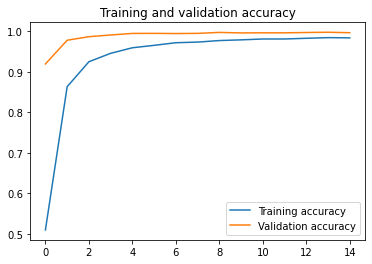

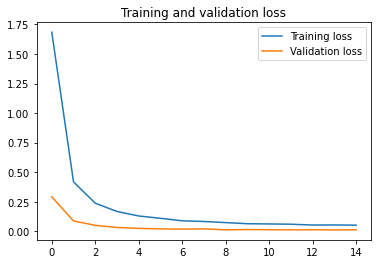

In [253]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy,  label='Training accuracy')
plt.plot(epochs, val_accuracy,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [254]:
## pickle model data
merge = [accuracy, val_accuracy,loss,val_loss]
fid = open("modelA&L_data_2&1.pkl","wb")
dump(merge, fid)
fid.close()

## Testing:

In [258]:
predicted_classes = model_2_1.predict_classes(X_test)

In [259]:
predicted_classes

array([25,  4, 17, ...,  9,  3, 18])

In [260]:
# Testing:
score = model_2_1.evaluate(X_test, y_test, verbose=1)
print('\nThe CNN Model accuracy: ', score[1])

395/395 [==============================] - 2s 5ms/step - loss: 0.1161 - accuracy: 0.9770

The CNN Model accuracy:  0.9770388007164001


# Applying Data Agumentation

In [166]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train.pkl'), 'rb')
X_train,y_train = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test.pkl'), 'rb')
X_test,y_test = load(fid)
fid.close()

## Reshape training, testing and validation data


In [168]:
type(X_train), type(X_test),type(X_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [169]:
# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, channels)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, channels)
#X_val = X_val.reshape(X_val.shape[0], img_height, img_width, channels) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_val = X_val.astype('float32')

In [170]:
type(X_train), type(X_test),type(X_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [171]:
X_train

array([[[[ 63,  60,  57],
         [ 63,  62,  61],
         [ 64,  63,  59],
         ...,
         [198, 208, 211],
         [202, 209, 212],
         [203, 206, 210]],

        [[ 63,  62,  60],
         [ 66,  64,  63],
         [ 65,  64,  61],
         ...,
         [204, 208, 210],
         [207, 209, 211],
         [206, 209, 214]],

        [[ 62,  61,  60],
         [ 66,  61,  60],
         [ 64,  62,  60],
         ...,
         [211, 213, 216],
         [210, 214, 219],
         [206, 211, 217]],

        ...,

        [[ 64,  59,  52],
         [ 69,  64,  55],
         [ 70,  66,  58],
         ...,
         [193, 200, 203],
         [170, 175, 175],
         [158, 164, 159]],

        [[ 58,  56,  51],
         [ 62,  61,  54],
         [ 68,  67,  57],
         ...,
         [186, 193, 197],
         [139, 148, 144],
         [114, 125, 122]],

        [[ 60,  59,  52],
         [ 66,  62,  54],
         [ 71,  65,  55],
         ...,
         [188, 190, 195],
        

In [174]:
y_train.shape, y_test.shape

((39209,), (12630,))

In [175]:
# Converting the output labels into one hot encoding

y_train = np_utils.to_categorical(y_train,NUM_CATEGORIES)

y_test = np_utils.to_categorical(y_test,NUM_CATEGORIES)


In [176]:
# Label after OneHotEncoding:
print ("Y_train: ",y_train.shape)
print (y_train[:5])

# Label after OneHotEncoding:
print ("Y_test: ",y_test.shape)
print (y_test[:5])

Y_train:  (39209, 43)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Y_test:  (12630, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

In [177]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32,32,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

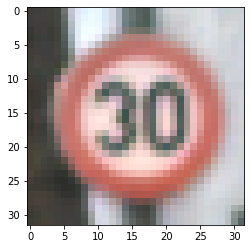

In [178]:
# Add the image to a batch
image = X_train[0]
image = tf.expand_dims(image, 0)
image.shape
plt.imshow(X_train[0])

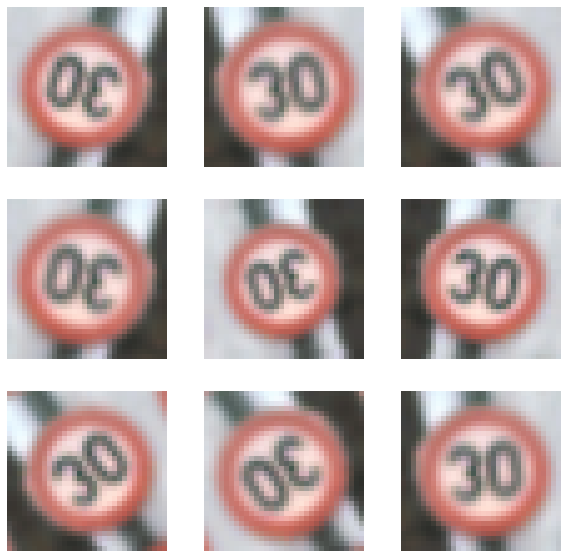

In [179]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
    

In [180]:
def model_creator_aug():
    model = Sequential([ data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255)])
    
    
    # CNN layer (with 32 3x3 filter):
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer:
    model.add(Dropout(0.25))   # Dropout layer to avoid overfitting
    
    # CNN layer (with 64 3x3 filter):
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer:
    model.add(Dropout(0.25))   # Dropout layer to avoid overfitting    
    
    
    # output Fully connected Dense layers:
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')
    
    print(model.summary())
    
    return model

In [181]:
model_aug = model_creator_aug()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 12, 64)      

In [183]:
%%time
epochs = 15

history = model_aug.fit(X_train, y_train, validation_split=0.20, epochs=15)

Epoch 1/15
981/981 [==============================] - 61s 62ms/step - loss: 2.8980 - accuracy: 0.2099 - val_loss: 1.0106 - val_accuracy: 0.6780
Epoch 2/15
981/981 [==============================] - 63s 64ms/step - loss: 1.2321 - accuracy: 0.5944 - val_loss: 0.4677 - val_accuracy: 0.8595
Epoch 3/15
981/981 [==============================] - 64s 65ms/step - loss: 0.8406 - accuracy: 0.7208 - val_loss: 0.2739 - val_accuracy: 0.9180
Epoch 4/15
981/981 [==============================] - 64s 65ms/step - loss: 0.6453 - accuracy: 0.7788 - val_loss: 0.2362 - val_accuracy: 0.9302
Epoch 5/15
981/981 [==============================] - 64s 65ms/step - loss: 0.5570 - accuracy: 0.8172 - val_loss: 0.1977 - val_accuracy: 0.9466
Epoch 6/15
981/981 [==============================] - 64s 65ms/step - loss: 0.5111 - accuracy: 0.8274 - val_loss: 0.1767 - val_accuracy: 0.9383
Epoch 7/15
981/981 [==============================] - 63s 65ms/step - loss: 0.4658 - accuracy: 0.8421 - val_loss: 0.1255 - val_accuracy:

In [188]:
model_aug.save("CNN_model_epoch_15_Augmentation.h5")

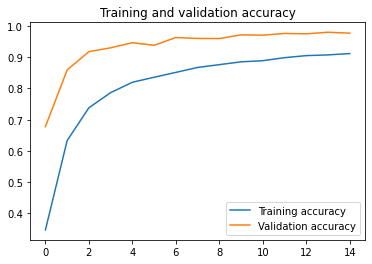

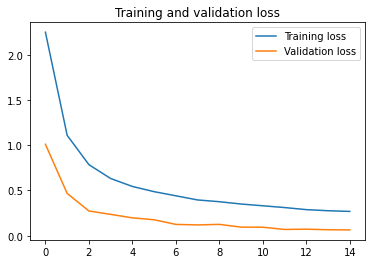

In [185]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy,  label='Training accuracy')
plt.plot(epochs, val_accuracy,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [189]:
## pickle model data
merge = [accuracy, val_accuracy,loss,val_loss]
fid = open("modelA&L_data_Augmentation.pkl","wb")
dump(merge, fid)
fid.close()

## Testing:

In [190]:
predicted_classes = model_aug.predict_classes(X_test)

In [191]:
predicted_classes

array([25,  4, 17, ...,  9,  3, 18])

In [193]:
# Testing:
score = model_aug.evaluate(X_test, y_test, verbose=1)
print('\nThe CNN Model accuracy: ', score[1])

395/395 [==============================] - 2s 6ms/step - loss: 0.2422 - accuracy: 0.9508

The CNN Model accuracy:  0.9507521986961365


# Prediction :

In [16]:
demoImg_dir = 'Images/'

In [17]:
@tf.function
def load_image(filename):
    # prepare image data
    image = Image.open(filename)
    image = image.resize((img_height,img_width))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image.reshape(image.shape[0],img_height, img_width, channels)
    image = image.astype('float32')
    image = image / 255
    return image

def predict_img(img_data):
    
    # load model for prediction
    base_model = load_model(model_dir+"CNN_model_epoch_15_2&1.h5")
    predict = base_model.predict_classes(img_data)
   # print("\nPredict Class:",traffic_classes[predict[0]],predict)
    return traffic_classes[predict[0]]

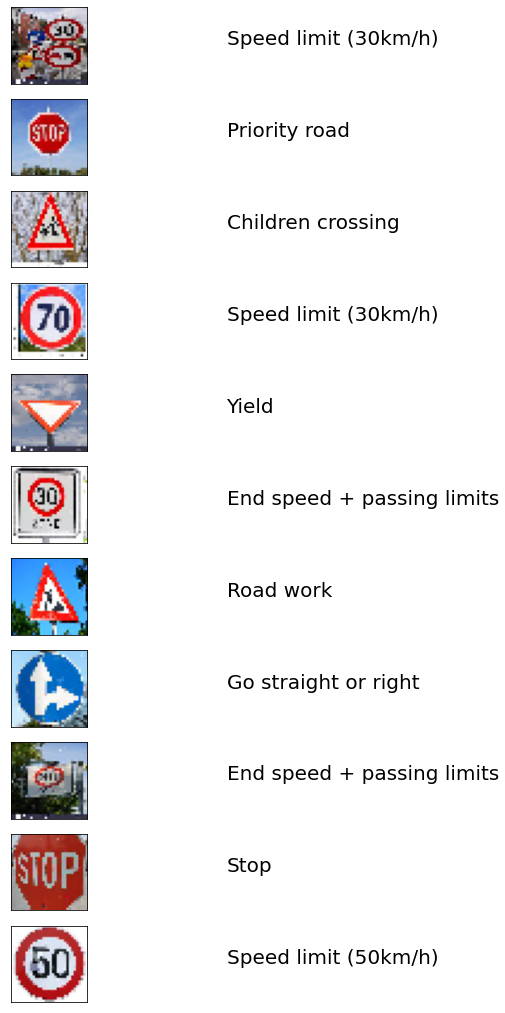

In [20]:
from keras.preprocessing.image import load_img
npic = len(os.listdir(demoImg_dir))
n = 0
npix = 32
target_size = (32,32,3)
count = 1
fig = plt.figure(figsize=(10,20))

#images = os.listdir(demoImg_dir)


for img_name in os.listdir(demoImg_dir):
    if not img_name.startswith('.'):
        image_load = load_img((demoImg_dir+img_name), target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1
        
        ## captions
        img_data = load_image(demoImg_dir+img_name)
        predict = predict_img(img_data)
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.5,predict,fontsize=20)
        count += 1
plt.show()

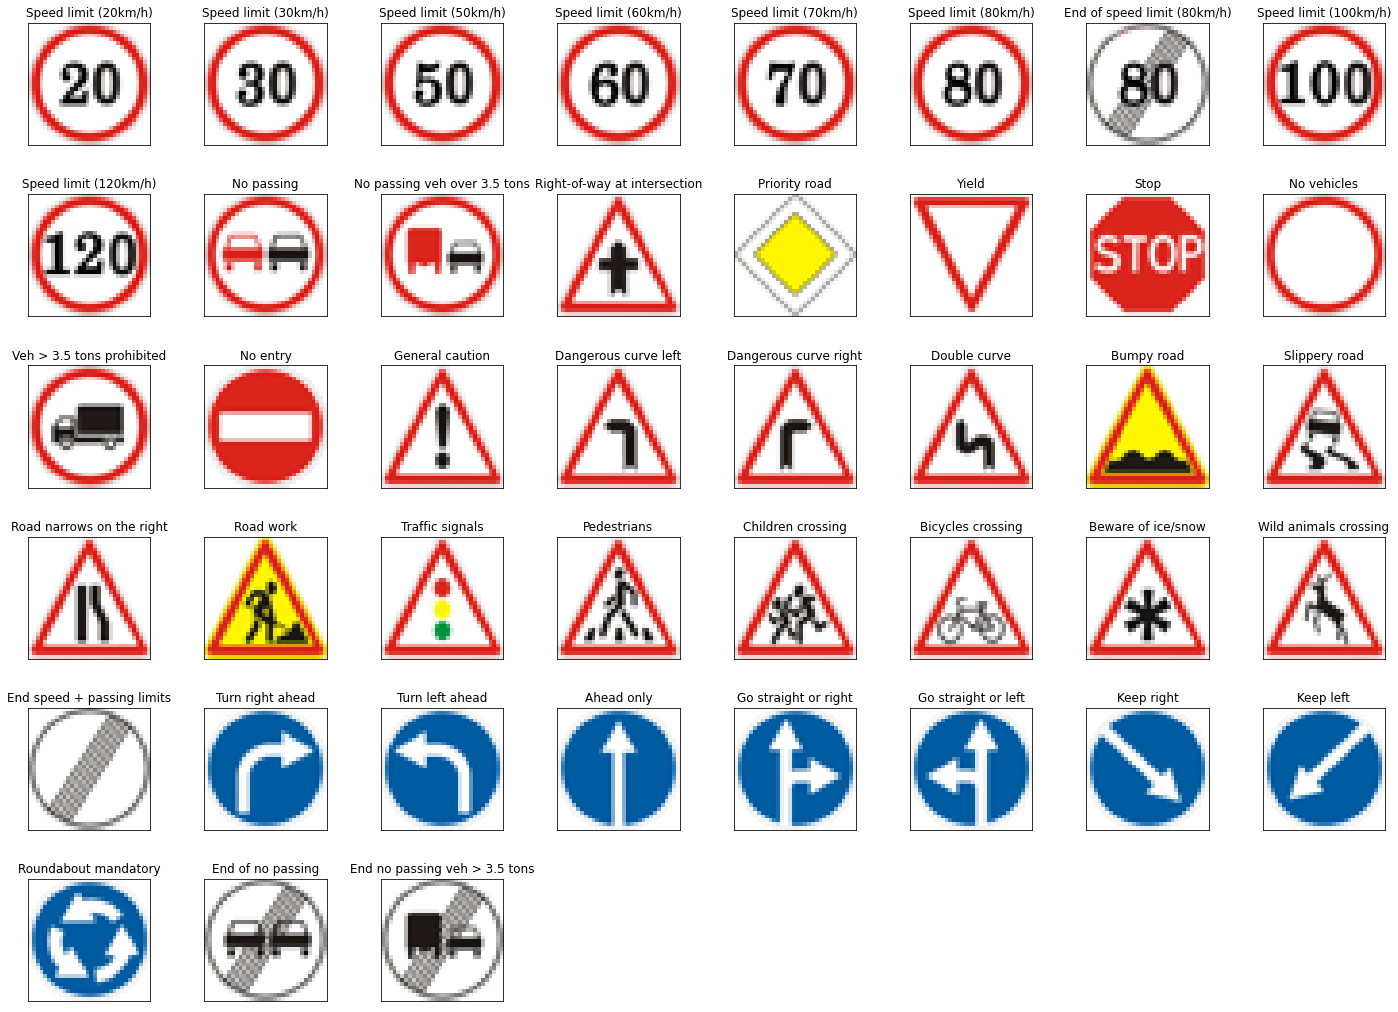

In [109]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show onw figure for each traffic sign

plt.figure(figsize=(25, 18))
plt.subplots_adjust(hspace = .4, wspace=.1)
for i in range(0, NUM_CATEGORIES):
    index = np.where(y_val==i)[0][0]
    image = X_val[index]
    plt.subplot(6, 8, i + 1)
    plt.title(traffic_classes[i])
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])